<a><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "left"></a>

 **<center><h1>Applied Data Science Capstone</h1></center>**

 **<center><h1>King County Redux</h1></center>**

<center><h3>Timothy Gaede</h3></center>

<center><h4>2020-12-08</h4></center>

<br><br>

<hr>

**<center><h2>Introduction: Business Problem</h2></center>** 

<br>

This notebook revisits the dataset used in the final week of Course 6 of the IBM Applied Data Science Professional Certificate Specialization. &nbsp; I will incorporate new location data and analysis techniques. 

The non-venue data originates from a .csv file of 21,613 house sales in King County, USA, from May 2014 to May 2015. It contains 18 potentially useful columns of information for predicting prices, such as the number of bedrooms and bathrooms, living space, latitude, longitude, and sales price. &nbsp; I may purge any outliers (including missing values) from the training data as being unreliable. &nbsp;  I will then break down this original data into smaller data frames according to the home's ZIP code.

Here is some information on the least self-explanatory data columns:

**waterfront**: House which has a view of a waterfront

**view**: Has been "viewed"

**condition**: How good the condition is overall

**grade**: Overall grade given to the housing unit, based on the King County grading system

**sqft_above**: Square footage of house apart from the basement  

**sqft_living15**: Living room area in 2015 (implies some renovations), which might or might not have affected the lot area

**sqft_lot15**: Lot area in 2015 (indicates some renovations)



<br>

I will leverage Foursquare location data to improve a predictive model for house prices in King County, USA.  &nbsp;By generating more accurate sales predictions, such a model would help a real estate agency reduce expenses in purchasing and gaining revenue in selling homes in a county that totaled over $11 billion in sales during a single year. &nbsp; In addition to house specifications, each home sold in King County during the twelve months will now have proximity data to venue "super-categories" (e.g., parks, shops, restaurants, etc.). &nbsp; The primary aim is to create a more predictive model than non-venue data can provide alone.


<br><br><br>
<hr>  


**<center><h2>Importing the Raw Data</h2></center>** 

<br><br>

Let's import pandas and download the initial data dataset:

In [175]:
import pandas as pd

In [176]:
file_name = "https://s3-api.us-geo.objectstorage.softlayer.net/"\
          + "cf-courses-data/CognitiveClass/DA0101EN/"\
          + "coursera/project/kc_house_data_NaN.csv"

df_KC = pd.read_csv(file_name)

In [177]:
df_KC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21613.0,1.080600e+04,6.239280e+03,0.000000e+00,5.403000e+03,1.080600e+04,1.620900e+04,2.161200e+04
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21600.0,3.372870e+00,9.266567e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21603.0,2.115736e+00,7.689959e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


<br><br><br>
<hr>  

**<center><h2>Exploratory Data Analysis</h2></center>**  

<br><br>

Notice that the data frame contains a column named "**Unnamed: 0**".  Are the values in that column equivalent to the row number? &nbsp; The code below will reveal the answer:

In [178]:
cnt_val_is_index_true  = 0
cnt_val_is_index_false = 0
for i in range(0, len(df_KC['Unnamed: 0'])):
    if df_KC['Unnamed: 0'].iloc[i] == i:
        cnt_val_is_index_true  += 1
    else:
        cnt_val_is_index_false += 1
        
print("The number of 'Unnamed: 0' values equal to its row number:     ", str(cnt_val_is_index_true))
        
print("The number of 'Unnamed: 0' values not equal to its row number: ", str(cnt_val_is_index_false))

The number of 'Unnamed: 0' values equal to its row number:      21613
The number of 'Unnamed: 0' values not equal to its row number:  0


<br><br>

Indeed, 'Unnamed: 0' just gives the row number.  &nbsp;  I'll drop the column if all 'id' values are unique:

In [179]:
len(pd.unique(df_KC['id'])), df_KC.shape[0]

(21436, 21613)

<br>

The 'id' values are not unique.  Let's investigate a bit further:

In [180]:
df_KC['id'].value_counts()

795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436, dtype: int64

In [181]:
df_KC[df_KC['id'] == 795000620].transpose()

,17602,17603,17604
Unnamed: 0,17602,17603,17604
id,795000620,795000620,795000620
date,20140924T000000,20141215T000000,20150311T000000
price,115000,124000,157000
bedrooms,3,3,3
bathrooms,1,1,1
sqft_living,1080,1080,1080
sqft_lot,6250,6250,6250
floors,1,1,1
waterfront,0,0,0


<br>

We can see that the 'id' values represent a home, not a sale. &nbsp; Exactly one home in King County was sold three times within the one-year period, with the price rising.

Rather than drop the column, 'Unnamed: 0', I'll rename it as 'KC index' for possible later reference. &nbsp;  While I'm renaming columns, I'll rename 'long' as 'lng' as that is a convention used by folium:

In [182]:
df_KC.rename(columns={'Unnamed: 0' : 'KC index', 'long' : 'lng'}, inplace=True)

<br><br>

Below is a function I wrote called printCols(), which neatly prints column names.  

<br>
Click the three dots to reveal the code.

In [183]:
def printCols(df, width_total, column_wise, alphabetical):
    
    colNames = []
    len_max = 0
    for i in range(0, len(df.columns)):
        colName = str(df.columns[i])
        colNames.append(colName)
        
        if len(colName) > len_max:
            len_max = len(colName)
    
    
    if alphabetical:
        colNames.sort()
        
      
    
    pad = 1 + int(len_max / 4)
    width_col = len_max + pad
    
    numCols = int(width_total / width_col)
   
    
    
    
    if column_wise == False:
        text_line = ""
        for i in range(0, len(colNames)):

            text_line += colNames[i].ljust(width_col)

            if (i % numCols == numCols-1)    or    (i == len(df.columns)-1):
                print(text_line)
                text_line = ""


    
    else:   
        
    
        numRowsFull = int(len(colNames) / numCols)
        numColsInRow = [numCols   for r in range(0, numRowsFull)]

        
        
        boxTopSize = numCols * numRowsFull
        if boxTopSize == len(colNames):
           
            numColsInRowLast = numCols
            numRows = numRowsFull
        else:
           
            numColsInRowLast = len(colNames) - boxTopSize
           
            numRows = numRowsFull + 1
            numColsInRow.append(numColsInRowLast)



        numRowsInCol = [numRows    for c in range(0, numColsInRowLast)]

        for col in range(numColsInRowLast, numCols):
            numRowsInCol.append(numRowsFull)

         

         
        for row in range(0, numRows):
            index = row
            text_line = ""
            for col in range(0, numColsInRow[row]): 
                text_line += colNames[index].ljust(width_col)                 
                index += numRowsInCol[col]
            print(text_line)
 
    

<br><br>

And now a quick look at the column names:

In [184]:
printCols(df_KC, width_total=50, column_wise=True, alphabetical=True)

KC index         sqft_above       
bathrooms        sqft_basement    
bedrooms         sqft_living      
condition        sqft_living15    
date             sqft_lot         
floors           sqft_lot15       
grade            view             
id               waterfront       
lat              yr_built         
lng              yr_renovated     
price            zipcode          


<br><br>

Now that we've settled on the column names, a good follow-up step in exploratory data analysis is to look for any missing values:

In [185]:
print("NaN values:\n")

data = []
for col in df_KC.columns: 
    if df_KC[col].isnull().sum() != 0:
        print(col.ljust(15, '.'), str(df_KC[col].isnull().sum()).rjust(2, '.'))

NaN values:

bedrooms....... 13
bathrooms...... 10


<br><br>

The only columns with missing values are 'bedrooms' and 'bathrooms'.

<br> 

We will either replace those NaN values or remove any row with a NaN value. &nbsp; Let's first look at those bedroom and bathroom counts:

In [186]:
import math
import numpy as np

<br>
Click the three dots to reveal a function to compute the geometric mean of an array:

In [187]:
# The geometric mean is the antilog of the (arithmetic) average of the logarithms
# It is appropriate for distributions that are more lognormal than normal

def meanGeometric(a):
# Must have numpy imported as np

    n = 0    

    sum_log_items = 0.0 # sum of logarithms of all n elements of a.
    for item in a:
        if math.isnan(item) == False:
            n += 1
            sum_log_items += np.log(item)
     

    return np.exp(sum_log_items / n)

In [188]:
print('Bedroom counts:')
print(df_KC['bedrooms'].value_counts())
print()
print("median  : ", df_KC['bedrooms'].median())
print("mean    : ", df_KC['bedrooms'].mean())
print("mean geo: ", meanGeometric(df_KC['bedrooms']))


print("\n"*3)

print("Bathroom counts:")
print(df_KC['bathrooms'].value_counts())
print("median  : ", df_KC['bathrooms'].median())
print("mean    : ", df_KC['bathrooms'].mean())
print("mean geo: ", meanGeometric(df_KC['bathrooms']))

Bedroom counts:
3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

median  :  3.0
mean    :  3.37287037037037
mean geo:  3.246753836938138




Bathroom counts:
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
median  :  2.25
mean    :  2.1157362403369904
mean geo:  1.969081612742183


<br><br>

We see an entry for a house with 33 bedrooms. &nbsp;  Let's look at that entry:

In [189]:
df_KC[df_KC['bedrooms'] == 33].transpose()

,15870
KC index,15870
id,2402100895
date,20140625T000000
price,640000
bedrooms,33
bathrooms,1.75
sqft_living,1620
sqft_lot,6000
floors,1
waterfront,0


<br><br>


I doubt the existence of a home with 33 bedrooms, yet with only 1¾ bathrooms, a 580 square foot basement, and a floor space of 1040 square feet above the basement.

<br>

I have a high degree of confidence that the actual number of bedrooms is 3.  &nbsp; This is the same as the median, often used to replace NaN values. &nbsp; However, I will dismiss this entire row as being unreliable:

In [190]:
df_KC = df_KC[df_KC.bedrooms != 33.0]

print('Bedroom counts:')
print(df_KC['bedrooms'].value_counts())

Bedroom counts:
3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
Name: bedrooms, dtype: int64


<br><br>


What about those NaN values? &nbsp;  There were only 23 NaN values in 21613 rows; I will also remove those rows as being unreliable:

In [191]:
df_KC = df_KC.dropna()

df_KC.shape[0]

21596

<br><br><br>


 
Now we peek at correlations.  I am interested in features (predictor variables) that correlate well with the target (in our case, 'price') but not too strongly with each other (indicating redundancy). &nbsp;

Let's look at correlations among all pairs of columns.  Rather than use a heatmap, I wrote a function, printCorrsSorted() to sort the values:

<br> 
Click the three dots to reveal the function:

In [192]:
def printCorrsSorted(df, excluded): 
    corrsNegative = []
    corrsPositive = [] 
    
    for i in range(0, df.shape[1]-1):
        col_i = df.columns[i] # string of name
        
        if df[col_i].dtypes in ['float64', 'int64']    and    col_i not in excluded: 
            for j in range(i+1, df.shape[1]):                
                col_j = df.columns[j] # string of name
                if df[col_j].dtypes in ['float64', 'int64']    and    col_j not in excluded:
           
                    corr_ij = df[col_i].corr(df[col_j]) 
            
                    if corr_ij < 0.0:
                        corrsNegative.append((corr_ij , (col_i, col_j)))  
                    else:
                        corrsPositive.append((corr_ij , (col_i, col_j))) 
                    
    corrsNegative.sort()
    
    corrsPositive.sort()
    corrsPositive.reverse()
    
    for corr in corrsNegative:
        print("{0:.5f}".format(corr[0]), " ", corr[1][0].ljust(20, '.'), corr[1][1])
        
    print("\n"*5)

    for corr in corrsPositive:
         print("{0:.5f}".format(corr[0]), " ", corr[1][0].ljust(20, '.'), corr[1][1])

<br><br>

Now Let's put my function to good use:

In [193]:
printCorrsSorted(df_KC, excluded=['zipcode', 'id', 'KC index'])

-0.36155   condition........... yr_built
-0.26401   floors.............. condition
-0.24569   floors.............. sqft_basement
-0.22492   yr_built............ yr_renovated
-0.15883   condition........... sqft_above
-0.14834   yr_built............ lat
-0.14685   condition........... grade
-0.14453   sqft_basement....... lng
-0.13534   lat................. lng
-0.13304   sqft_basement....... yr_built
-0.12644   bathrooms........... condition
-0.10580   condition........... lng
-0.09298   condition........... sqft_living15
-0.08613   lat................. sqft_lot15
-0.08551   sqft_lot............ lat
-0.07812   view................ lng
-0.06833   yr_renovated........ lng
-0.06077   condition........... yr_renovated
-0.05940   sqft_living......... condition
-0.05365   view................ yr_built
-0.05213   sqft_above.......... sqft_basement
-0.04191   waterfront.......... lng
-0.02616   waterfront.......... yr_built
-0.01521   condition........... lat
-0.01430   waterfront.......... la

<br>

The correlation for “condition” and “yr_built” has a substantially more negative value than all other correlation pairs. &nbsp; It almost certainly is indicative of deterioration. The correlation between “condition” and “grade” is negative, but only slightly so. &nbsp; Therefore they should not be opposite scales of the exact matter.

   
<br> 

Note that the weakest correlation, -0.00116, is for "sqft_above" and "lat", while the correlation for "sqft_above" and "lng" is solid 0.34482. &nbsp;  This marked difference in correlation implied that as we travel eastward, away from the Puget Sound, the areas above the basement increase. &nbsp; Traveling northward or southward has virtually no effect on the areas above the basement.

<br>

It is also interesting to note that "sqft_living" occupies the top three correlation pairs.

<br><br>

Since we are interested in predicting price, let's see how that correlates with the other columns:

In [194]:
# [2:] skips the first two columns, which are for 'KC index' and 'id' 
df_KC[df_KC.columns[2:]].corr()['price'][:].sort_values()

zipcode         -0.053443
lng              0.022103
condition        0.036000
yr_built         0.053995
sqft_lot15       0.082841
sqft_lot         0.089885
yr_renovated     0.126418
floors           0.256831
waterfront       0.266438
lat              0.306772
bedrooms         0.315966
sqft_basement    0.323772
view             0.397323
bathrooms        0.525915
sqft_living15    0.585273
sqft_above       0.605395
grade            0.667935
sqft_living      0.701921
price            1.000000
Name: price, dtype: float64

<br>
 
I find it noteworthy that prices do not vary much with longitude but do with latitude.

Note that the correlations' magnitude jumps from 0.126418 to 0.256831 with "yr_renovated" and "floors".  

We will tentatively choose all columns with a correlation higher than that for "yr_renovated" as modeling features.  If there had not been a substantial jump in the correlation with "price", I would look at the other correlation pairs to help decide a cutoff point.  If two features (predictors) have a strong correlation with each other but not so strong with the target, then perhaps there is a redundancy in the features.   


But let's quickly investigate the idea of using logarithmic values.

<br><br><br>

<hr> 

**<center><h4>Modeling with Logarithmic Values?</h4></center>**

<br><br>

Continuing our data exploration, let's look at a scatterplot of price values with its highest correlation column, sqft_living:

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

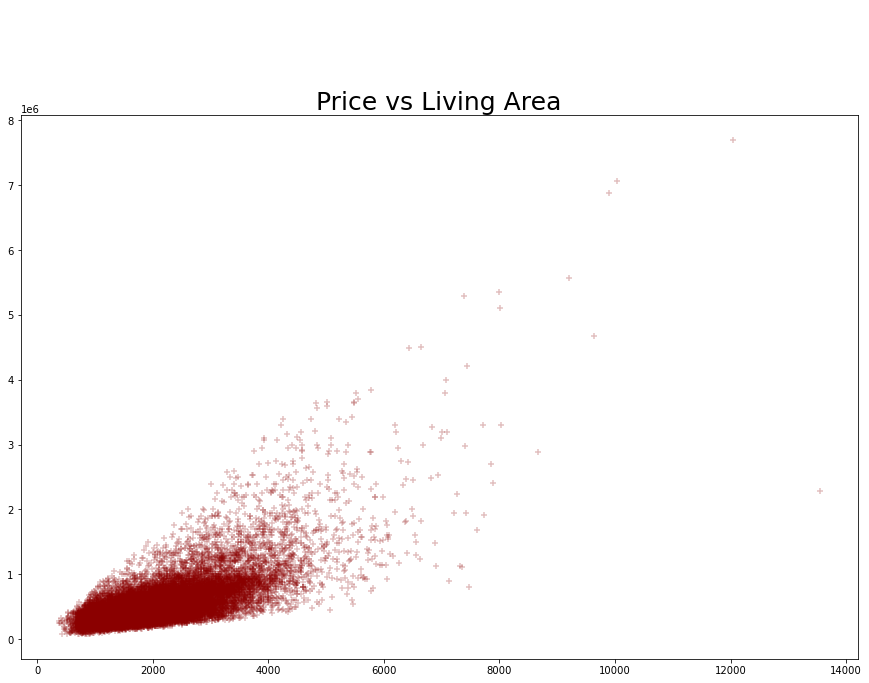

In [196]:
plt.figure(figsize = (15, 10))

 
plt.title("\n\n\nPrice vs Living Area", size=25)

y = df_KC['price']
x = df_KC['sqft_living']  
plt.scatter(x, y, color='darkred', alpha=0.25, marker='+') 
 
plt.show()

Perhaps the values for price and sqft_living are more lognormally distributed than normally distributed.

<br>

Let's look at a scatterplot of the log values:

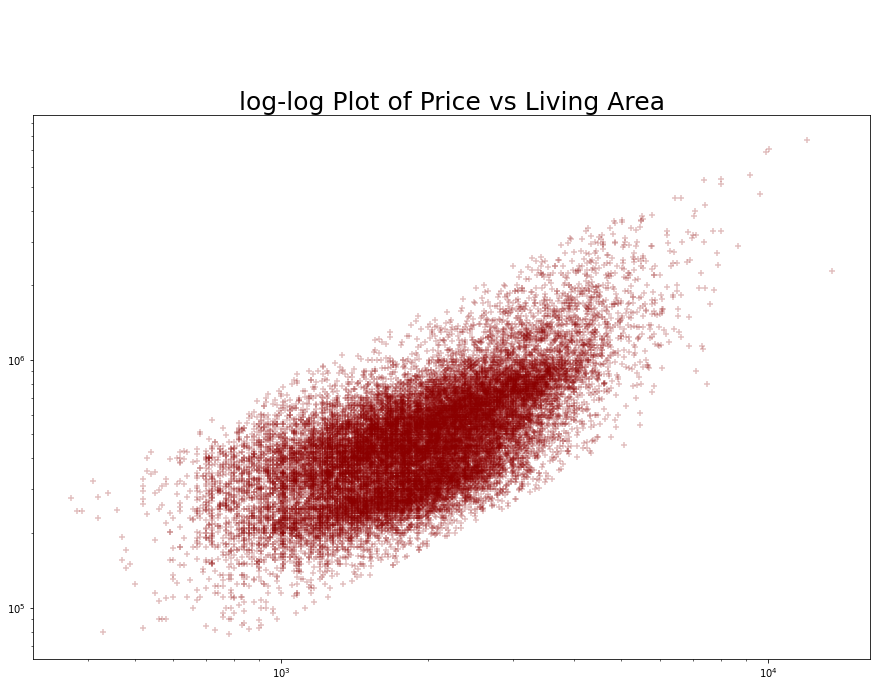

In [197]:
plt.figure(figsize = (15, 10))

 
plt.title("\n\n\nlog-log Plot of Price vs Living Area", size=25)

y = df_KC['price']
x = df_KC['sqft_living']  
plt.scatter(x, y, color='darkred', alpha=0.25, marker='+') 
 

plt.yscale('log')
plt.xscale('log')

plt.show()

<br>

Since the log-log plot is more evenly distributed, perhaps using logarithms may make for a better predictive model.

Recall that the correlation of "price" with "sqft_living" was just over 0.70:

In [198]:
df_KC['price'].corr(df_KC['sqft_living'])

0.701920873491349

<br>

What about the correlation of their logarithms, as seen in the second scatterplot?

In [199]:
np.log(df_KC['price']).corr(np.log(df_KC['sqft_living']))

0.6748078935902969

<br><br>


The correlation is lower! &nbsp; Perhaps using logarithms would be of little help, if at all, for our predictive modeling.  

<br><br><br><br>

<hr> 

**<center><h3>Breaking King County down into ZIP Codes</h3></center>**

#### Breaking the King County dataset down into ZIP codes will help overcome Foursquare's limitations by allowing us to thoroughly searching one ZIP code at a time for all venues. It may also produce a better predictive model. We may offset the smaller number of houses for training data by the predictive power of locality.

<br>

What is the range of ZIP code numbers in King County?

In [200]:
print("The range of ZIP codes is ", df_KC['zipcode'].min(), " to ", df_KC['zipcode'].max())

The range of ZIP codes is  98001  to  98199


<br>

Let's create a data frame for each ZIP code number in the range. &nbsp; Some data frames may be empty because there are no entries for a particular ZIP code number.

In [201]:
df_98 = [None]

for last3 in range(1, 200):
    df_98.append(df_KC[df_KC['zipcode'] == 98000 + last3])

<br>

How many ZIP codes are in King County?

In [202]:
numZipcodes = 0

for last3 in range(1, 200):
    if df_98[last3].shape[0] > 0:
        numZipcodes += 1
        
numZipcodes

70

<br><br>

Let's create a data frame for these seventy ZIP codes. 

<br>

This may take several seconds.

In [203]:
zipcodes    = []



numsHouses  = []


priceMins_k   = []
price25pcts_k = []
price50pcts_k = []
price75pcts_k = []
priceMaxes_k  = []

priceAvgs_k   = []

priceTotals_M = []


latMins  = []
latMaxes = []
latMaps  = [] # NOT the average latitude.  This would be for the center of a map

lngMins  = []
lngMaxes = []
lngMaps  = [] # NOT the average longitude.  This would be for he center of a map




for last3 in range(1, 200):
    if df_98[last3].shape[0] > 0:
        
        zipcodes.append(98000 + last3)
        
        numsHouses.append(df_98[last3].shape[0])
        
        df_descr = df_98[last3].describe()
        
        
        priceMins_k.append(df_descr['price']['min'] / 1000.0)
        price25pcts_k.append(df_descr['price']['25%'] / 1000.0)
        price50pcts_k.append(df_descr['price']['50%'] / 1000.0)
        price75pcts_k.append(df_descr['price']['75%'] / 1000.0)
        priceMaxes_k.append(df_descr['price']['max'] / 1000.0)

        priceAvgs_k.append(df_descr['price']['mean'] / 1000.0)

        priceTotals_M.append(df_descr['price']['mean'] * df_98[last3].shape[0] / 10**6) # Find a more elegant way?
        
        
        latMin = df_descr['lat']['min']
        latMax = df_descr['lat']['max']
        latMap = (latMin + latMax) / 2
        
        latMins.append(latMin)
        latMaxes.append(latMax)
        latMaps.append(latMap)
        
        
        lngMin = df_descr['lng']['min']
        lngMax = df_descr['lng']['max']
        lngMap = (lngMin + lngMax) / 2
        
        lngMins.append(lngMin)
        lngMaxes.append(lngMax)
        lngMaps.append(lngMap)
        
        
        
        
        
        
data = {'zipcode': zipcodes,
        'houses': numsHouses,
        'price_min (k$)': priceMins_k,
        'price_25% (k$)': price25pcts_k,
        'price_50% (k$)': price50pcts_k,
        'price_75% (k$)': price75pcts_k,
        'price_max (k$)': priceMaxes_k,
        'price_avg (k$)': priceAvgs_k,
        'price_TOTAL (M$)': priceTotals_M,
        'lat min': latMins,
        'lat Map': latMaps,
        'lat max': latMaxes,
        'lng min': lngMins,
        'lng Map': lngMaps,
        'lng max': lngMaxes}


 


colNames = []
for item in data:
    colNames.append(item)
    


df_zipcodes = pd.DataFrame(data, columns=colNames)

df_zipcodes

,zipcode,houses,price_min (k$),price_25% (k$),price_50% (k$),price_75% (k$),price_max (k$),price_avg (k$),price_TOTAL (M$),lat min,lat Map,lat max,lng min,lng Map,lng max
0,98001,361,100.00,215.000,260.000,320.0000,850.0,281.194870,101.511348,47.2576,47.30755,47.3575,-122.294,-122.2625,-122.231
1,98002,199,95.00,199.975,235.000,268.5000,389.0,234.284035,46.622523,47.2761,47.31465,47.3532,-122.229,-122.1545,-122.080
2,98003,280,128.00,229.000,267.475,330.0000,950.0,294.111279,82.351158,47.2574,47.30640,47.3554,-122.334,-122.2570,-122.180
3,98004,317,425.00,845.000,1150.000,1691.0000,7062.5,1355.927082,429.828885,47.5806,47.61535,47.6501,-122.229,-122.1710,-122.113
4,98005,168,400.00,637.775,765.475,911.2500,1960.0,810.164875,136.107699,47.5830,47.62085,47.6587,-122.185,-122.1675,-122.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,98177,255,245.56,428.500,554.000,739.4750,3800.0,676.185392,172.427275,47.7013,47.73945,47.7776,-122.393,-122.3750,-122.357
66,98178,262,90.00,223.250,278.277,349.7925,1700.0,310.612756,81.380542,47.4816,47.49685,47.5121,-122.279,-122.2495,-122.220
67,98188,136,110.00,228.750,264.000,335.0000,707.0,289.078346,39.314655,47.4232,47.44645,47.4697,-122.298,-122.2805,-122.263
68,98198,280,95.00,216.375,265.000,340.0000,1350.0,302.878882,84.806087,47.3429,47.38305,47.4232,-122.334,-122.3110,-122.288


<br><br>

What ZIP codes have the most number of houses?

In [204]:
df_zipcodes.groupby(by='zipcode')['houses'].sum().sort_values(ascending=False)[0:19]

zipcode
98103    601
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
Name: houses, dtype: int64

<br><br>

These ZIP codes may provide sufficient data points for training and testing to provide a predictive model.

<br>

What are the ZIP codes that had the highest total sales?

In [205]:
df_zipcodes.groupby(by='zipcode')['price_TOTAL (M$)'].sum().sort_values(ascending=False)[0:19]

zipcode
98004    429.828885
98006    428.123020
98052    370.362856
98115    361.402019
98103    351.481365
98033    347.206834
98040    336.772866
98117    318.967639
98074    302.352147
98112    294.689323
98034    284.300808
98075    283.817019
98053    272.876389
98027    254.200124
98199    251.007196
98059    230.982585
98038    216.211884
98118    211.931816
98116    204.149276
Name: price_TOTAL (M$), dtype: float64

<br>

ZIP codes 98004 and 98006 stand out with their total values of 429.8 million and 428.1 million dollars, respectively. &nbsp;  How many houses are in those two ZIP codes?

In [206]:
df_98[4].shape[0], df_98[6].shape[0]

(317, 498)

<br><br>

Those two ZIP codes will be our primary focus in predictive modeling.

<br><br>

Let's have a look at a map of the house prices of ZIP code 98004.

<br>

First, import the needed tools

In [207]:
import matplotlib
import folium

<br><br>



And now a functions, mapCol() and mapColDefault() to generate a map of data frame items with 'lat', 'lng' values with the marker color based on a value from a specified color.

<br>
Click the three dots to reveal the functions.

In [208]:
def mapCol(df, col, lo, hi):  
    
     
    
    # Inner function to convert a number to a color
    def color_b_to_w(num, lim_lo, lim_hi):
        frac = (num - lim_lo) / (lim_hi - lim_lo)

        if frac < 1/7: 
            r = 7*frac
            b = 0.0
            g = 0.0 

        elif frac < 2/7:

            r = 1.0
            g = 7*frac - 1.0
            b = 0.0

        elif frac < 3/7:

            r = -7*frac + 3.0
            g = 1.0
            b = 0.0

        elif frac < 4/7:

            r = 0.0
            g = 1.0
            b = 7*frac - 3.0

        elif frac < 5/7:

            r = 0.0
            g = -7*frac + 5.0
            b = 1.0

        elif frac < 6/7:

            r = 7*frac - 5.0
            g = 0.0
            b = 1.0

        else:
            r = 1.0
            g = 7*frac - 6.0
            b = 1.0	




        # fix roundoff problems:
        if r < 0.0:    
            r = 0.0 
        elif r > 1.0:
            r = 1.0 

        if g < 0.0:    
            g = 0.0 
        elif g > 1.0:
            g = 1.0 

        if b < 0.0:    
            b = 0.0 
        elif b > 1.0:
            b = 1.0 


        return (r,g,b)    
    
    
    
    
    
     
    
    
    
    
    
    
   
    lat_mid = ( df['lat'].min() + df['lat'].max() ) / 2 
    lng_mid = ( df['lng'].min() + df['lng'].max() ) / 2
    
       
    mp = folium.Map(location=[lat_mid, lng_mid], zoom_start=12, tiles='Stamen Terrain')    
                 
                 
                
            
    for i in range(0, df.shape[0]):
        
        lng = df.iloc[i]['lng']
        lat = df.iloc[i]['lat']
        val = df.iloc[i][col]
        
        color_val = matplotlib.colors.to_hex(color_b_to_w(val, lo, hi))
        
        folium.Circle(location=[lat, lng], radius=50, color=color_val, fill=True,
                      fill_color=color_val, alpha=0.1).add_to(mp)
        
                 
                    
                    
                    
                    
                     
    return mp



def mapColDefault(df, col):
    lo = df[col].min()
    hi = df[col].max()
    
    
    return mapCol(df, col, lo, hi)

<br><br>

Let's map the house sales for ZIP code 98004. &nbsp;  Near-white circles indicate a sales price near the highest for the ZIP code. 

In [209]:
mapColDefault(df_98[4], 'price')

In [210]:
df_98[4]['lng'].sort_values()

9593    -122.229
12287   -122.228
16933   -122.227
7231    -122.227
15213   -122.227
          ...   
8728    -122.189
5886    -122.189
3504    -122.189
4428    -122.185
13314   -122.113
Name: lng, Length: 317, dtype: float64

In [211]:
df_98[4].loc[13314]

KC index                   13314
id                     627300145
date             20140814T000000
price                  1.148e+06
bedrooms                      10
bathrooms                   5.25
sqft_living                 4590
sqft_lot                   10920
floors                         1
waterfront                     0
view                           2
condition                      3
grade                          9
sqft_above                  2500
sqft_basement               2090
yr_built                    2008
yr_renovated                   0
zipcode                    98004
lat                      47.5861
lng                     -122.113
sqft_living15               2730
sqft_lot15                 10400
Name: 13314, dtype: object

<br> 


Perhaps the supposed longitude of -122.113 was actually -122.223, or maybe someone mistyped the ZIP code. &nbsp;  Whatever the case, I will create a new data frame with the outlier dropped.

In [212]:
ind = df_98[4][df_98[4]['lng'] ==df_98[4]['lng'].max()].index

df_98004 = df_98[4].drop(ind)

df_98004['lng'].sort_values()

9593    -122.229
12287   -122.228
7231    -122.227
15213   -122.227
2181    -122.227
          ...   
7451    -122.190
8728    -122.189
5886    -122.189
3504    -122.189
4428    -122.185
Name: lng, Length: 316, dtype: float64

<br><br>

Do the house sales for ZIP code 98006 have a physical outlier that 98004 did?

In [213]:
mapColDefault(df_98[6], 'price')

 
No. &nbsp;  Nothing appears amiss with the physical distribution of houses for ZIP code 98006.

<br><br>

Did we miss any other outliers in the data?  &nbsp;  We can look at a few plots.

In [214]:
df_KC.columns

Index(['KC index', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'lng', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

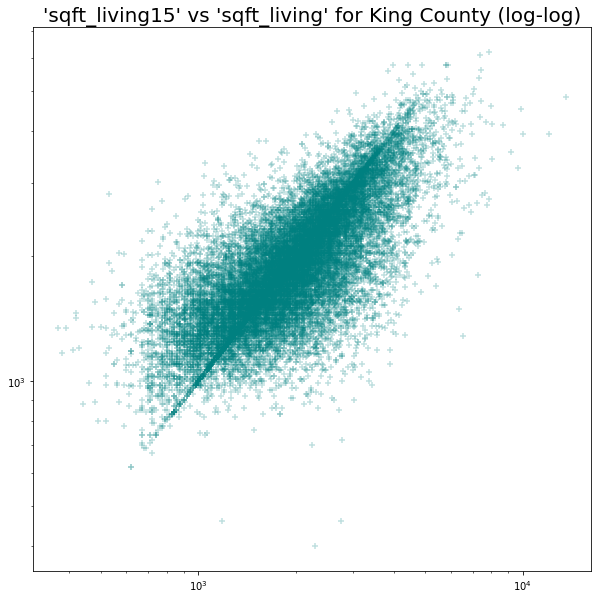

In [215]:
X = df_KC['sqft_living']

Y = df_KC['sqft_living15'] 

plt.figure(figsize = (10, 10))

plt.title("'sqft_living15' vs 'sqft_living' for King County (log-log)", size=20)



 

plt.scatter(X, Y, color='teal', alpha=0.25, marker='+') 
 



plt.yscale('log')
plt.xscale('log')

plt.show()

<br><br>

Perhaps the three data points at the bottom are due to typos

In [216]:
df_KC[df_KC['sqft_living15'] < 600].transpose()

,12106,13441,17286
KC index,12106,13441,17286
id,3822200036,2722059275,9421500130
date,20140624T000000,20150512T000000,20140616T000000
price,257500,536000,378000
bedrooms,2,3,5
bathrooms,2,2.75,2.5
sqft_living,1180,2290,2760
sqft_lot,9265,34548,8015
floors,1,2,1
waterfront,0,0,0


<br><br>

I cannot tell for sure. &nbsp;  I will leave these three data points in the data frame and conclude data cleaning.

<br><br>

Before incorporating Foursquare venue location data, let's see how using a predictive model trained on the entire county performs on a ZIP code versus a predictive model trained only on that ZIP code 98004 and perhaps also 98006:

In [217]:
from sklearn.linear_model import LinearRegression


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline


from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import train_test_split as TTS

from sklearn.linear_model import Ridge

<br><br>


My python function, RM_gen(), is for generating a good ridge model. It works by testing various alphas and then returning the ridge model with the best mean cross-validation score (CVS).

 
The tested values of the alphas are integer powers of two from 2⁻¹⁰ to 2⁹.

<br>
Click the three dots to reveal the code

In [218]:
def RM_gen(df, features, target):
    X = df[features]
    Y = df[target] # df['price']

    
    x_tr, x_te, y_tr, y_te = TTS(X, Y, test_size=0.333, random_state=1)

    pwr_start = -10
    pwr = pwr_start
    
    RM = Ridge(alpha=2^pwr)

    RM.fit(x_tr, y_tr) 
    CVS_mean = CVS(RM, X, Y, cv=6).mean()
    CVS_mean_best = CVS_mean
    pwr_best = pwr
    for pwr in range(pwr_start+1, 9):
        RM = Ridge(alpha=2^pwr)

        RM.fit(x_tr, y_tr) 
        CVS_mean = CVS(RM, X, Y, cv=6).mean()
        
        if CVS_mean > CVS_mean_best:
            CVS_mean_best = CVS_mean
            pwr_best = pwr 
            RM_best = RM

    
    return RM_best, CVS_mean_best

<br><br>

We'll generate our ridge model for the King County with the columns most correlated with 'price'.

In [219]:
df_KC[df_KC.columns[2:]].corr()['price'][:].sort_values()

zipcode         -0.053443
lng              0.022103
condition        0.036000
yr_built         0.053995
sqft_lot15       0.082841
sqft_lot         0.089885
yr_renovated     0.126418
floors           0.256831
waterfront       0.266438
lat              0.306772
bedrooms         0.315966
sqft_basement    0.323772
view             0.397323
bathrooms        0.525915
sqft_living15    0.585273
sqft_above       0.605395
grade            0.667935
sqft_living      0.701921
price            1.000000
Name: price, dtype: float64

In [220]:
features_11_orig = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
                    "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]     

target = "price"

<br><br>

Running my function, RM_gen(), may take a minute.

In [221]:
RM_KC, RM_KC_CVS_mean = RM_gen(df_KC, features_11_orig, target)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.63107e-17): result may not be accurate.
  overwrite_a=True).T
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.48642e-17): result may not be accurate.
  overwrite_a=True).T


<br><br>

What was the mean cross-validation score (CVS) for the best ridge model trained and tested on King County?

In [222]:
RM_KC_CVS_mean

0.6546366650614855

<br>

If we apply this ridge model to ZIP code 98004, what would our mean CVS scores be?

In [223]:
CVS(RM_KC, df_98004[features_11_orig], df_98004[target], cv=6).mean()

0.7869294433101705

<br><br>

 
The mean cross-validation score (CVS) for a model trained on all of King is substantially higher when applied exclusively to ZIP code 98004 (0.78693 vs. 0.65464). &nbsp;

What if we had trained only on the homes in ZIP code 98004?

<br>

We will use the same eleven features used to train the King County model.

In [224]:
RM_98004_11_orig, RM_98004_CVS_mean_11_orig = RM_gen(df_98004, features_11_orig, target)

RM_98004_CVS_mean_11_orig

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.32626e-17): result may not be accurate.
  overwrite_a=True).T


0.792646939847904

<br><br>

That is a slight improvement. &nbsp;  This is despite having fewer data points for training and selecting features based on what correlates well with 'price' for the entire county rather than King County. &nbsp;   Can we break the 0.8 barrier for mean CVS if we select features that correlate well with 'price' for just ZIP code 98004?

<br>

What correlates well with 'price' strictly within ZIP code 98004?

In [225]:
df_98004[df_98004.columns[2:]].corr()['price'][:].sort_values()

lng             -0.457909
condition       -0.206285
yr_renovated     0.166762
lat              0.245290
floors           0.302157
sqft_basement    0.322911
yr_built         0.374246
sqft_lot15       0.397100
bedrooms         0.417090
waterfront       0.431111
sqft_lot         0.437797
view             0.492025
sqft_living15    0.580278
bathrooms        0.673396
grade            0.732462
sqft_above       0.806284
sqft_living      0.859665
price            1.000000
zipcode               NaN
Name: price, dtype: float64

In [226]:
features_for_98004 = ['lng', 'lat', 'floors', 'sqft_basement', 
                     'yr_built', 'sqft_lot15', 'bedrooms', 'waterfront', 'sqft_lot', 'view', 
                     'sqft_living15', 'bathrooms', 'grade', 'sqft_above', 'sqft_living']

In [227]:
RM_98004_for_98004, RM_98004_CVS_mean_for_98004 = RM_gen(df_98004, features_for_98004, target)

RM_98004_CVS_mean_for_98004

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.95541e-18): result may not be accurate.
  overwrite_a=True).T
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.04254e-17): result may not be accurate.
  overwrite_a=True).T
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.92207e-18): result may not be accurate.
  overwrite_a=True).T


0.7768089168823965

<br><br>

The mean CVS when down.  What if we try all the columns?

In [228]:
features_all_orig = ['lng', 'condition', 'yr_renovated', 'lat', 'floors', 'sqft_basement', 
                     'yr_built', 'sqft_lot15', 'bedrooms', 'waterfront', 'sqft_lot', 'view', 
                     'sqft_living15', 'bathrooms', 'grade', 'sqft_above', 'sqft_living']

In [229]:
RM_98004_all_orig, RM_98004_CVS_mean_all_orig = RM_gen(df_98004, features_all_orig, target)

RM_98004_CVS_mean_all_orig

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.89261e-18): result may not be accurate.
  overwrite_a=True).T
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.64602e-18): result may not be accurate.
  overwrite_a=True).T
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.89385e-18): result may not be accurate.
  overwrite_a=True).T


0.7763755392251549

<br><br>


The mean CVS is still less than the one we got using the original eleven features (0.792646939847904). &nbsp;  We'll keep these eleven features and add nine more based on venue locations that we will acquire using Foursquare. 

<br><br>

<br><br><br><br>


<hr>


**<center><h1>Acquiring Foursquare Data</h1></center>**  

<br>


I will now use a custom Python function and my Foursquare credentials to collect venue location and category data.


I will then remove duplicate venues and clean up the remaining data to clearly show venue categories and geographical coordinates.  
 
Finally, as many categories will be nearly identical, I will consolidate categories into "super-categories" to map and predict house prices.

In [230]:
import requests

<br>
<br>

## **My Foursquare Credentials**

In [231]:
CLIENT_ID     = 'HSQAVEIPSQKVY0ASQYNIF35CNH0NFU0RCCH1I0B3KWBBSCCO'
CLIENT_SECRET = 'FYFLWX5ITEHPFOSPAFDMX551WRIRLBKZBN53WP0U3JBT4V05'
VERSION       = '20150531' # Last day of May, 2015

print('\nMy Foursquare credentials:\n')
print('CLIENT_ID:     ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)
print('\n')


My Foursquare credentials:

CLIENT_ID:     HSQAVEIPSQKVY0ASQYNIF35CNH0NFU0RCCH1I0B3KWBBSCCO
CLIENT_SECRET: FYFLWX5ITEHPFOSPAFDMX551WRIRLBKZBN53WP0U3JBT4V05




#### To overcome Foursquare's limit of 100 venues per request, I wrote a function, generated_df_vens(), which integrates several requests.

The function accepts these arguments: 

* A data frame containing location data for non-venues (such as houses).

* A minimum distance for the function to search for venues from each non-venue.

* A minimum number of requests to execute.

* The number of additional rows & columns for additional sweeps should the limit of 100 venues in a request is reached.


The function sweeps in rows running from west to east with a computed request radius.

Should a request return the limit of 100 venues, an internal function runs an additional sweep for venues.  Should this internal function also encounter a limit of 100 venues, then it will flag the outer function as having an insufficient

The function returns venue data as a data frame with duplicates removed.

<br>
Click the three dots to reveal the function

In [232]:
def generated_df_vens(df, client_ID, client_secret, version, padding_km, requests_minNum, subRequests_per_Request_minNum): 
    def cat_type(row):
        try:    cat_list = row['categories']
        except: cat_list = row['venue.categories']
    
        if len(cat_list) == 0: return None
        else                 : return cat_list[0]['name']
  
        
    # ---------------------------------------------------------------------------
    # Custom function if geopy could not be installed
    def geoDist_km(A_loc, B_loc):
    # Requires numpy to be imported as np

        A_lat = A_loc[0]
        A_lng = A_loc[1]

        B_lat = B_loc[0]
        B_lng = B_loc[1]

        def cosd(a):
            return np.cos(np.deg2rad(a))

        def sind(a):
            return np.sin(np.deg2rad(a))

        # Get angle for perfect sphere ---------------------------------------------    
        cosdA_lat = cosd(A_lat)
        cosdB_lat = cosd(B_lat)

        A_x = cosdA_lat*cosd(A_lng)
        B_x = cosdB_lat*cosd(B_lng)

        A_y = cosdA_lat*sind(A_lng)
        B_y = cosdB_lat*sind(B_lng)

        A_z = sind(A_lat)
        B_z = sind(B_lat)


        angle_rad = np.arccos(A_x * B_x  +  A_y * B_y  +  A_z * B_z)
        # --------------------------------------------------------------------------

        # Get radius based on Earth's Obliquity
        # This method is typically 1.45x to 1.50x as fast as when using
        # the spheroid model of the Earth.
        # Always within 0.001% and 0.1 km?

        Earth_r_polar_km = 6_357.7523
        Earth_r_equat_km = 6_378.137
        Earth_r_diff_km  = Earth_r_equat_km - Earth_r_polar_km


        M_lat = (A_lat + B_lat) / 2.0
        M_r_km = Earth_r_polar_km + Earth_r_diff_km * (cosd(2*M_lat) + 1.0) / 2.0
        A_r_km = Earth_r_polar_km + Earth_r_diff_km * (cosd(2*A_lat) + 1.0) / 2.0
        B_r_km = Earth_r_polar_km + Earth_r_diff_km * (cosd(2*B_lat) + 1.0) / 2.0


        r_km = (A_r_km + 4*M_r_km + B_r_km) / 6.0 # Inspired by Simpson's rule



        return r_km * angle_rad
    # def geoDist_km(A, B)-----------------------------------------------------------
    
    
    Earth_r_polar_km = 6_357.7523
    
    def cosd(a):
            return np.cos(np.deg2rad(a))
    
        
    df_result = pd.DataFrame()
    
     
    degs_per_rad = 180.0 / np.pi
    sweep_lat_min = df.lat.min() - padding_km * degs_per_rad / Earth_r_polar_km 
    sweep_lat_max = df.lat.max() + padding_km * degs_per_rad / Earth_r_polar_km 
    
    sweep_lat_avg = (sweep_lat_min + sweep_lat_max) /  2
    
    sweep_span_lat = sweep_lat_max - sweep_lat_min
    
    
        
    if abs(sweep_lat_max) > abs(sweep_lat_min):
        lat_key = sweep_lat_max
    else:
        lat_key = sweep_lat_min
        
        
        
            
    sweep_lng_min = df.lng.min() - padding_km * degs_per_rad / (Earth_r_polar_km * cosd(lat_key))
    sweep_lng_max = df.lng.max() + padding_km * degs_per_rad / (Earth_r_polar_km * cosd(lat_key))
    
    sweep_lng_avg = (sweep_lng_min + sweep_lng_max) / 2
    
    sweep_span_lng = sweep_lng_max - sweep_lng_min
    
    
    print("Sweeping from ", "(", str(sweep_lat_max), ", ", str(sweep_lng_min), ")")
    print("           to ", "(", str(sweep_lat_min), ", ", str(sweep_lng_max), ")")
    print()                                                             
                                                                 
    
    width_km =  geoDist_km((sweep_lat_min, sweep_lng_avg), (sweep_lat_max, sweep_lng_avg))
    height_km = geoDist_km((sweep_lat_avg, sweep_lng_min), (sweep_lat_avg, sweep_lng_max))
    
    print("width  ", width_km)
    print("height ", height_km)
    
    if width_km > height_km:
        aspect = width_km / height_km
        sweep_rows = int((requests_minNum / aspect)**0.5) + 1
        sweep_cols = int(requests_minNum / sweep_rows) + 1
    else:
        aspect = height_km / width_km
        sweep_cols = int((requests_minNum / aspect)**0.5) + 1
        sweep_rows = int(requests_minNum / sweep_cols) + 1  
    
    
    
    
    print("sweep rows and columns: ", str(sweep_rows), ", ", str(sweep_cols))
    
     
     
    
    for sweep_row in range(0, sweep_rows):
        sweep_lat = sweep_lat_min + (sweep_row + 0.5) * sweep_span_lat / sweep_rows       
        for sweep_col in range(0, sweep_cols):
            sweep_lng = sweep_lng_min + (sweep_col + 0.5) * sweep_span_lng / sweep_cols
            
            NE_corner_lat = sweep_lat + 0.5 * sweep_span_lat / sweep_rows
            NE_corner_lng = sweep_lng + 0.5 * sweep_span_lng / sweep_cols
            radius_m = 1050*geoDist_km((sweep_lat, sweep_lng), (NE_corner_lat, NE_corner_lng))
            
            
     
            url_to_format = 'https://api.foursquare.com/v2/venues/explore?&'\
                          + 'client_id={}&'\
                          + 'client_secret={}&'\
                          + 'v={}&'\
                          + 'll={},{}&'\
                          + 'radius={}&'\
                          + 'limit={}'


            url = url_to_format.format(client_ID, 
                                       client_secret,
                                       version,
                                       sweep_lat, sweep_lng,
                                       radius_m,
                                       100) # raising this beyond 100 does not help

            results = requests.get(url).json()
        
            #try: 
            df_ven = pd.json_normalize(results['response']['groups'][0]['items']) # flatten JSON
            numRows = df_ven.shape[0]

            #reqsInfo.append((numRows, radius_m, (sweep_lat, sweep_lng)))
            
            if numRows >= 100: # limit reached
            # Make a sub-sweep    
            
                #print("Making sub sweep for outer radius of ", radius_m)
                  
                #subRequests_per_Request_minNum = 16
                
                degs_per_rad = 180.0 / np.pi
    
                Earth_r_polar_km = 6_357.7523

                def cosd(a):
                        return np.cos(np.deg2rad(a))


                diff_lat = (radius_m / 1000.0)* degs_per_rad / Earth_r_polar_km

                sub_lat_min = sweep_lat - diff_lat 
                sub_lat_max = sweep_lat + diff_lat 
                
                sub_lat_avg = (sub_lat_min + sub_lat_max) / 2
                sub_span_lat = sub_lat_max - sub_lat_min
                

                if abs(sub_lat_max) > abs(sub_lat_min):
                    lat_sub_key = sub_lat_max
                else:
                    lat_sub_key = sub_lat_min
                    
                    

                diff_lng = (radius_m / 1000.0)* degs_per_rad / (Earth_r_polar_km * cosd(lat_sub_key))
                    
                sub_lng_min = sweep_lng - diff_lng
                sub_lng_max = sweep_lng + diff_lng
                
                sub_lng_avg = (sub_lng_min + sub_lng_max) / 2
                sub_span_lng = sub_lng_max - sub_lng_min
                

                sub_width_km =  geoDist_km((sub_lat_min, sub_lng_avg), (sub_lat_max, sub_lng_avg))
                sub_height_km = geoDist_km((sub_lat_avg, sub_lng_min), (sub_lat_avg, sub_lng_max))

                

                if sub_width_km > sub_height_km:
                    sub_aspect = sub_width_km / sub_height_km
                    sub_rows = int((subRequests_per_Request_minNum / sub_aspect)**0.5) + 1
                    sub_cols = int(subRequests_per_Request_minNum / sub_rows) + 1
                else:
                    sub_aspect = sub_height_km / sub_width_km
                    sub_cols = int((subRequests_per_Request_minNum / aspect)**0.5) + 1
                    sub_rows = int(subRequests_per_Request_minNum / sub_cols) + 1  

                
                #print(sub_rows, " ", sub_cols)
 



                for row in range(0, sub_rows):
                    sub_lat = sub_lat_min + (row + 0.5) * sub_span_lat / sub_rows       
                    for col in range(0, sub_cols):
                        sub_lng = sub_lng_min + (col + 0.5) * sub_span_lng / sub_cols

                        NE_corner_lat = sub_lat + 0.5 * sub_span_lat / sub_rows
                        NE_corner_lng = sub_lng + 0.5 * sub_span_lng / sub_cols
                        sub_radius_m = 1050*geoDist_km((sub_lat, sub_lng), (NE_corner_lat, NE_corner_lng))

                        #print("sub_radius_m ", sub_radius_m)

                        url_to_format = 'https://api.foursquare.com/v2/venues/explore?&'\
                                      + 'client_id={}&'\
                                      + 'client_secret={}&'\
                                      + 'v={}&'\
                                      + 'll={},{}&'\
                                      + 'radius={}&'\
                                      + 'limit={}'


                        url = url_to_format.format(client_ID, 
                                                   client_secret,
                                                   version,
                                                   sub_lat, sub_lng,
                                                   sub_radius_m,
                                                   100)
                        


                        results = requests.get(url).json()

                        #try: 
                        df_ven_sub = pd.json_normalize(results['response']['groups'][0]['items']) # flatten JSON
                        numRows_sub = df_ven_sub.shape[0]
                        
                        if numRows_sub >= 100:
                            raise Exception("Foursquare request limit reached even while making a sub-sweep.")

                        #reqsInfo.append((numRows, radius_m, (sweep_lat, sweep_lng)))
                        if numRows_sub > 0:

                            # Filter the columns
                            cols_filt = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
                            df_ven_sub = df_ven_sub.loc[:, cols_filt]




                            # Filter the category for each row
                            df_ven_sub['venue.categories'] = df_ven_sub.apply(cat_type, axis=1)
                             
                            # Clean the columns
                            df_ven_sub.columns = [col.split(".")[-1]    for col in df_ven_sub.columns]

                             

                            if df_result.shape[0] == 0:
                                df_result = df_ven_sub
                            else:
                                df_result = pd.concat([df_result, df_ven_sub], ignore_index=True)
                                 
                
                 
                 
                
            
            elif numRows > 0:   

                # Filter the columns
                cols_filt = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
                df_ven = df_ven.loc[:, cols_filt] 

                # Filter the category for each row
                df_ven['venue.categories'] = df_ven.apply(cat_type, axis=1)
                
                    
                     
                # Clean the columns
                df_ven.columns = [col.split(".")[-1]    for col in df_ven.columns]

                df_ven

                if df_result.shape[0] == 0:
                    df_result = df_ven
                else:
                    df_result = pd.concat([df_result, df_ven], ignore_index=True)
                    
                    
                    
                    
                     
    df_result = df_result.drop_duplicates()
        
    return df_result 

<br><br>

The function took several hours to collect and combine data.  &nbsp;  Although the function overcame Foursquare's 100 venue limit per request by "re-sweeping" an area with smaller radii, consolidating venue location data for the entire county still took time due to another of Foursquare's limits.

I've commented out some example code as it uses my credentials and also takes several minutes.

In [233]:
 
# df_KC_vens = pd.DataFrame

# df_98033Vens = generated_df_vens(df_98[33], CLIENT_ID, CLIENT_SECRET, VERSION, 5, 400, 16)

# df_KC_vens = pd.concat([df_KC_Vens, df_98033Vens])
 

<br><br>

Here is an image of a map of Foursquare requests for the original reported ZIP code 98004 with a 5 kilometer buffer.

<br> 

The circle color ranging from black to white represents the number of venues returned within the circle from 1 to 99. 

If the function reaches the limit of 100, it performs a "resweep" with smaller radii.

<a><img src = "https://github.com/Tim-Gaede/Coursera_Capstone/blob/master/Sweep%2098%5B4%5D.png?raw=true" width = 1024, align = "left"></a>

<br><br>

Below is zoomed-in an example of a "resweep":

<a><img src = "https://github.com/Tim-Gaede/Coursera_Capstone/blob/master/Resweep%2098%5B4%5D%201.png?raw=true" width = 1024, align = "left"></a>

<br><br>

I've saved some data frames of local venue data to my GitHub account. &nbsp;  I created the one for ZIP code 98004 & vicinity before the easterly outlier was spotted and is therefore centered a bit east of the homes.  This slight oversight may be for the better as travel times eastward (away from downtown) are favorable.  Let's download it.

In [234]:
df_98004vens = pd.read_csv("https://raw.githubusercontent.com/Tim-Gaede/Coursera_Capstone/master/zc004Vens.csv")

df_98004vens

,Unnamed: 0,name,categories,lat,lng
0,0,The Cajun Crawfish,Cajun / Creole Restaurant,47.539290,-122.282677
1,1,Hoang Lan,Vietnamese Restaurant,47.538349,-122.282021
2,2,The UPS Store,Shipping Store,47.536821,-122.284519
3,3,Tammy's Bakery,Bakery,47.537505,-122.282841
4,4,Taco Street,Taco Place,47.538100,-122.281290
...,...,...,...,...,...
2906,3290,Romio's Pizza & Pasta,Pizza Place,47.671587,-122.116033
2907,3307,Great Clips,Salon / Barbershop,47.670103,-122.110649
2908,3313,Geeks on a Trail - Redmond,Trail,47.671032,-122.110001
2909,3337,Cartridge World,Paper / Office Supplies Store,47.672706,-122.110799


In [235]:
df_98004vens = df_98004vens.drop(columns=['Unnamed: 0'])
df_98004vens

,name,categories,lat,lng
0,The Cajun Crawfish,Cajun / Creole Restaurant,47.539290,-122.282677
1,Hoang Lan,Vietnamese Restaurant,47.538349,-122.282021
2,The UPS Store,Shipping Store,47.536821,-122.284519
3,Tammy's Bakery,Bakery,47.537505,-122.282841
4,Taco Street,Taco Place,47.538100,-122.281290
...,...,...,...,...
2906,Romio's Pizza & Pasta,Pizza Place,47.671587,-122.116033
2907,Great Clips,Salon / Barbershop,47.670103,-122.110649
2908,Geeks on a Trail - Redmond,Trail,47.671032,-122.110001
2909,Cartridge World,Paper / Office Supplies Store,47.672706,-122.110799


<br><br>

What are the most popular categories for venues in and around ZIP code 98004?

In [236]:
df_98004vens['categories'].value_counts()[0:30]

Park                      173
Coffee Shop               124
Pizza Place                68
Trail                      66
Gym                        65
Food Truck                 59
Sandwich Place             52
Bus Stop                   47
Café                       44
Chinese Restaurant         42
Grocery Store              41
Playground                 41
Thai Restaurant            38
Beach                      36
Mexican Restaurant         33
Bank                       32
Gym / Fitness Center       31
Japanese Restaurant        31
Bakery                     30
Pharmacy                   29
Hotel                      29
Burger Joint               29
Convenience Store          27
Vietnamese Restaurant      27
Lake                       26
Italian Restaurant         26
Clothing Store             26
Furniture / Home Store     26
Shipping Store             26
American Restaurant        25
Name: categories, dtype: int64

<br><br>

Note the words "Place" and "Restaurant" used in several categories. &nbsp; I'll merge these into a single "super-category" while other categories like "Park" will be their own super-category.

<br>

Let's create a data frame of "remaining" venues not yet placed into a super-category.

In [237]:
df_98004vens_rem = df_98004vens.copy() # remaining venues

<br><br>

Let's create a data frame of parks around ZIP code 98004.

In [238]:

df_98004parks = df_98004vens_rem[df_98004vens_rem['categories'] == 'Park'] 

# Remove parks from the dataframe of remaining venues
df_98004vens_rem = df_98004vens_rem.drop(df_98004parks.index.tolist())

df_98004parks

,name,categories,lat,lng
21,Othello Playground,Park,47.536418,-122.273816
34,Martha Washington Park,Park,47.543454,-122.261116
38,Pioneer Park,Park,47.542121,-122.221656
63,Hazelwood Park,Park,47.536990,-122.177801
112,Shangrila,Park,47.540463,-122.099540
...,...,...,...,...
2781,North Rose Hill Park Boardwalk,Park,47.686965,-122.173123
2785,Mark Twain Park,Park,47.695322,-122.168970
2794,Meadow Neighborhood Park,Park,47.695321,-122.126341
2799,Hartman Park,Park,47.692049,-122.109955


<br>

What are the remaining venue categories?

In [239]:
df_98004vens_rem['categories'].value_counts()[0:9]

Coffee Shop           124
Pizza Place            68
Trail                  66
Gym                    65
Food Truck             59
Sandwich Place         52
Bus Stop               47
Café                   44
Chinese Restaurant     42
Name: categories, dtype: int64

<br>

Let's combine "Coffee Shop" and "Café" into a venue "super-category".

In [240]:
df_98004coffee = df_98004vens_rem[df_98004vens_rem['categories'].isin(['Coffee Shop', 'Café'])]

df_98004vens_rem = df_98004vens_rem.drop(df_98004coffee.index.tolist())

df_98004coffee

,name,categories,lat,lng
7,Ambrosia Tea & Espresso,Café,47.539002,-122.282445
22,Starbucks,Coffee Shop,47.536499,-122.273777
36,Starbucks,Coffee Shop,47.541036,-122.225855
43,Starbucks,Coffee Shop,47.542461,-122.221790
60,Newcastle Espresso,Coffee Shop,47.544933,-122.191127
...,...,...,...,...
2833,New York Cafe Deli Market,Café,47.613741,-122.197047
2838,Nordstrom Grill,Café,47.616992,-122.204008
2849,Woods Coffee,Coffee Shop,47.616206,-122.204966
2878,Starbucks,Coffee Shop,47.615723,-122.196398


<br><br>

Now, what remains to place into a super-category?

In [241]:
df_98004vens_rem['categories'].value_counts()[0:20]

Pizza Place              68
Trail                    66
Gym                      65
Food Truck               59
Sandwich Place           52
Bus Stop                 47
Chinese Restaurant       42
Grocery Store            41
Playground               41
Thai Restaurant          38
Beach                    36
Mexican Restaurant       33
Bank                     32
Japanese Restaurant      31
Gym / Fitness Center     31
Bakery                   30
Pharmacy                 29
Hotel                    29
Burger Joint             29
Vietnamese Restaurant    27
Name: categories, dtype: int64

<br><br>

Creating a data frame for the super-category for restaurants will be a bit tricky as there are several different associated words:

In [242]:
catRestaurants = "Restaurant|Diner|Sandwich|Burger|Pizza|Steakhouse|Place"
 
df_98004restr = df_98004vens_rem[df_98004vens_rem['categories'].str.contains(catRestaurants)]

df_98004vens_rem = df_98004vens_rem.drop(df_98004restr.index.tolist())

df_98004restr

,name,categories,lat,lng
0,The Cajun Crawfish,Cajun / Creole Restaurant,47.539290,-122.282677
1,Hoang Lan,Vietnamese Restaurant,47.538349,-122.282021
4,Taco Street,Taco Place,47.538100,-122.281290
5,Huong Duong Sunflower,Vietnamese Restaurant,47.537819,-122.281354
6,Foo Lam,Chinese Restaurant,47.538482,-122.282948
...,...,...,...,...
2884,Thai Grill,Thai Restaurant,47.617468,-122.197092
2885,Huang Ji Huang,Chinese Restaurant,47.626858,-122.144725
2892,Shaburina,Shabu-Shabu Restaurant,47.634474,-122.137524
2904,Pecado Bueno,Mexican Restaurant,47.671538,-122.119001


<br><br>

Let's have a look at all the categories for the super-category of restaurants.

In [243]:
df_98004restr['categories'].value_counts()[0:60]

Pizza Place                        68
Sandwich Place                     52
Chinese Restaurant                 42
Thai Restaurant                    38
Mexican Restaurant                 33
Japanese Restaurant                31
Burger Joint                       29
Vietnamese Restaurant              27
Italian Restaurant                 26
American Restaurant                25
Indian Restaurant                  22
Asian Restaurant                   21
Sushi Restaurant                   20
Fast Food Restaurant               18
Seafood Restaurant                 13
Steakhouse                         10
Restaurant                         10
New American Restaurant            10
Taco Place                          9
Korean Restaurant                   8
Greek Restaurant                    8
Ethiopian Restaurant                8
French Restaurant                   7
Mediterranean Restaurant            7
Ramen Restaurant                    6
Taiwanese Restaurant                6
Dumpling Res

<br><br>

It looks like we're sorting things out.  What's left?

In [244]:
df_98004vens_rem['categories'].value_counts()[0:9]

Trail                   66
Gym                     65
Food Truck              59
Bus Stop                47
Grocery Store           41
Playground              41
Beach                   36
Bank                    32
Gym / Fitness Center    31
Name: categories, dtype: int64

<br><br>

We'll create one data frame for trails and another for gyms & fitness centers.

In [245]:
df_98004trails = df_98004vens_rem[df_98004vens_rem['categories'] == 'Trail']

df_98004vens_rem = df_98004vens_rem.drop(df_98004trails.index.tolist())


 

df_98004gyms = df_98004vens_rem[df_98004vens_rem['categories'].isin(['Gym', 'Gym / Fitness Center'])]

df_98004vens_rem = df_98004vens_rem.drop(df_98004gyms.index.tolist())

In [246]:
df_98004trails

,name,categories,lat,lng
54,Lake Washington Trail,Trail,47.539152,-122.195537
101,Cinder Mine Trailhead,Trail,47.538010,-122.134918
104,Red Town Trailhead,Trail,47.534801,-122.128827
106,Red Town Dam,Trail,47.536146,-122.124124
108,Sky Country Trailhead,Trail,47.536820,-122.116790
...,...,...,...,...
2775,Forbes Creek Stairs,Trail,47.694344,-122.197479
2791,PSE Powerline Trail,Trail,47.694926,-122.126074
2813,Redmond Watershed,Trail,47.696122,-122.051204
2817,gasline trails @ union hill,Trail,47.689447,-122.043965


In [247]:
df_98004gyms

,name,categories,lat,lng
20,Rainier Health and Fitness,Gym,47.536454,-122.273826
40,Mercer Island Country Club,Gym / Fitness Center,47.539866,-122.223332
50,Mercer Island Saddle Club,Gym / Fitness Center,47.541402,-122.222668
58,Newcastle Fitness,Gym,47.543645,-122.196501
96,Coal Creek Family YMCA,Gym,47.540967,-122.156062
...,...,...,...,...
2767,SPCC Work-Out Room,Gym,47.689249,-122.269316
2815,Jazzercise,Gym / Fitness Center,47.690506,-122.044459
2822,Elite Fitness,Gym,47.609336,-122.204012
2872,LA Fitness,Gym,47.615224,-122.199186


<br><br>

What's left?

In [248]:
df_98004vens_rem['categories'].value_counts()[0:9]

Food Truck       59
Bus Stop         47
Grocery Store    41
Playground       41
Beach            36
Bank             32
Bakery           30
Hotel            29
Pharmacy         29
Name: categories, dtype: int64

<br><br>

The "Food Truck" category sounds too small and mobile to me.  I'll create a data frame for bus stops.

In [249]:
df_98004bus = df_98004vens_rem[df_98004vens_rem['categories'] == 'Bus Stop']

df_98004vens_rem = df_98004vens_rem.drop(df_98004bus.index.tolist()) 

In [250]:
df_98004bus.head()

,name,categories,lat,lng
217,Metro stop #35060,Bus Stop,47.551070,-122.264879
308,Issaquah TC Bay 2 (#64555),Bus Stop,47.542266,-122.062441
309,Issaquah TC Bay 3 (#64585),Bus Stop,47.541892,-122.062355
518,Metro Bus Stop #64594,Bus Stop,47.561773,-122.089478
592,Bus Stop On Allen Rd,Bus Stop,47.571555,-122.158437


<br><br>

And now for groceries.

In [251]:
groc_cats = ["Supermarket", "Grocery Store", "Farmers Market"]

df_98004groc = df_98004vens_rem[df_98004vens_rem['categories'].isin(groc_cats)]

df_98004vens_rem = df_98004vens_rem.drop(df_98004groc.index.tolist())

In [252]:
df_98004groc

,name,categories,lat,lng
11,Safeway,Grocery Store,47.537435,-122.283054
41,QFC,Supermarket,47.541367,-122.225682
68,Newcastle Fruit & Produce,Farmers Market,47.537294,-122.164627
70,Safeway,Grocery Store,47.539687,-122.167377
71,QFC,Supermarket,47.539079,-122.164831
...,...,...,...,...
2602,QFC,Supermarket,47.680818,-122.126439
2632,Safeway,Grocery Store,47.671953,-122.109957
2663,Safeway,Grocery Store,47.682610,-122.289432
2755,QFC,Supermarket,47.689906,-122.290393


<br><br>

Playgrounds:

In [253]:
df_98004play = df_98004vens_rem[df_98004vens_rem['categories'] == 'Playground']

df_98004vens_rem = df_98004vens_rem.drop(df_98004play.index.tolist())

In [254]:
df_98004play.head()

,name,categories,lat,lng
9,"John C. Little, Sr. Park",Playground,47.539291,-122.286537
10,Van Asselt Playground,Playground,47.539715,-122.294204
116,Talus Playground,Playground,47.538175,-122.071925
222,Seward Park Playground,Playground,47.549395,-122.256329
232,Deane's Childrens Park,Playground,47.551925,-122.222545


<br><br>

The final super-category will be for pubs and bars. &nbsp; This will be somewhat tricky because there are several categories with "Bar", including some I want to exclude.

In [255]:
df_98004pubsPlus = df_98004vens_rem[df_98004vens_rem['categories'].str.contains("Pub|Bar")]

excluded = ['Salon / Barbershop', 'Karaoke Bar', 'Juice Bar']

df_98004pubs = df_98004pubsPlus[df_98004pubsPlus['categories'].isin(excluded) == False]

df_98004vens_rem = df_98004vens_rem.drop(df_98004pubs.index.tolist())

df_98004pubs

,name,categories,lat,lng
148,Malarkey's,Sports Bar,47.544686,-122.053447
203,Slow Boat Tavern,Pub,47.550971,-122.277818
205,Spinnaker Bay Brewing,Pub,47.550756,-122.277428
242,MUSTARD SEED GRILL & PUB,Bar,47.552016,-122.177643
284,Gaslamp Bar & Grill,Pub,47.543885,-122.058735
353,Columbia City Ale House,Pub,47.557432,-122.284625
360,Hummingbird Saloon,Bar,47.556062,-122.284073
363,Lottie's Lounge,Bar,47.557762,-122.284929
372,Backyard,Sports Bar,47.558025,-122.284156
385,Hill City Tap House & Bottle Shop,Bar,47.553726,-122.280554



<br><br><br>



Let's create an interactive map that allows selecting one of the nine super-category locations around zipcode 98004 with custom icons! &nbsp; 

First, we import the needed tools. 

In [256]:
import ipywidgets
import folium

<br><br>


For the map coordinates, latitude will be the middle of the extreme north and south homes, while longitude will be the middle of the extreme east and west homes.

In [257]:
zc98004_lat = (df_98[4].lat.min() + df_98[4].lat.max()) / 2

zc98004_lng = (df_98[4].lng.min() + df_98[4].lng.max()) / 2

zc98004_coords = (zc98004_lat, zc98004_lng)

zc98004_coords

(47.61535, -122.17099999999999)

<br><br>

I stored the icons on my GitHub page.  This function will return the appropriate url based on the icon's name.

In [258]:
def icon_url(name): 
    return "https://github.com/Tim-Gaede/Map-Marker-Icons/blob/master/" \
          + name + ".png?raw=true"

<br><br>

Function to return a map of the icons:

In [259]:
def mapIcons(coords_default, df, icon_url, size):
    
    if coords_default == None:
        center_lat = (df['lat'].min() + df['lat'].max()) / 2
        center_lng = (df['lng'].min() + df['lng'].max()) / 2
    else:
        center_lat = coords_default[0]
        center_lng = coords_default[1]
        
    
    mp = folium.Map(location=[center_lat, center_lng], 
                    zoom_start=12,
                    tiles='Stamen Terrain')
    
    
    for lat, lng in zip(df.lat, df.lng): 
        icon_custom = folium.features.CustomIcon(icon_url, icon_size=(size, size)) 
        folium.Marker([lat, lng], icon=icon_custom).add_to(mp)

   
    return mp

<br><br>

Generating the nine maps should take less than a minute:

In [260]:
mp_parks = mapIcons(zc98004_coords, df_98004parks, icon_url("Tree"), 20)
mp_coffee = mapIcons(zc98004_coords, df_98004coffee, icon_url("Coffee_Cup"), 20)
mp_restr = mapIcons(zc98004_coords, df_98004restr, icon_url("Burger"), 20) 

mp_trails = mapIcons(zc98004_coords, df_98004trails, icon_url("Hiker"), 30)
mp_gyms = mapIcons(zc98004_coords, df_98004gyms, icon_url("Gym"), 20)
mp_groc = mapIcons(zc98004_coords, df_98004groc, icon_url("Groceries"), 20)

mp_bus = mapIcons(zc98004_coords, df_98004bus, icon_url("Bus"), 30)
mp_play = mapIcons(zc98004_coords, df_98004play, icon_url("Basketball"), 30)
mp_pubs = mapIcons(zc98004_coords, df_98004pubs, icon_url("Beer"), 30) 

In [261]:
myOptions = ['Parks', 'Cafés', 'Restaurants', 'Trails', 'Gyms', 'Groceries', 
             'Bus Stops', 'Playgrounds', 'Pubs']

select_widget=ipywidgets.Select(options=myOptions,
                                value='Parks',
                                description='S-category:',
                                disabled=False)


# widget function
def select(super_category):
    if super_category == 'Parks':
        display(mp_parks)
    elif super_category == 'Cafés':
        display(mp_coffee)
    elif super_category == 'Restaurants':
        display(mp_restr) 
    elif super_category == 'Trails':
        display(mp_trails)
    elif super_category == 'Gyms':
        display(mp_gyms)
    elif super_category == 'Groceries':
        display(mp_groc)
    elif super_category == 'Bus Stops':
        display(mp_bus)
    elif super_category == 'Playgrounds':
        display(mp_play)
    elif super_category == 'Pubs':
        display(mp_pubs)
        
    
        
# interaction between widgets and function    
ipywidgets.interact(select, super_category=select_widget)  

interactive(children=(Select(description='S-category:', options=('Parks', 'Cafés', 'Restaurants', 'Trails', 'G…

<function __main__.select(super_category)>

<br><br>

<hr>

**<center><h2>Leveraging the Foursquare Data</h2></center>**

<br>

We finished creating data frames for all significant super-categories for venues of our neighborhood (zipcode 98004). 

We will leverage these new data frames to create new columns for our neighborhood data frame.  The values in these new columns will be a sorted array (list) of distances to locations of venues of a particular super-category.

To achieve this, I wrote a custom function, appendDistances():

<br>
Click the three dots to reveal the function.

In [262]:
def appendDistances(df_homes, df_venues, colName, LIMIT):
    
    
    
    
    
    
    
    
    
            
    # ---------------------------------------------------------------------------
    # Custom function if geopy could not be installed
    def geoDist_km(A_loc, B_loc):
    # Requires numpy to be imported as np

        A_lat = A_loc[0]
        A_lng = A_loc[1]

        B_lat = B_loc[0]
        B_lng = B_loc[1]

        def cosd(a):
            return np.cos(np.deg2rad(a))

        def sind(a):
            return np.sin(np.deg2rad(a))

        # Get angle for perfect sphere ---------------------------------------------    
        cosdA_lat = cosd(A_lat)
        cosdB_lat = cosd(B_lat)

        A_x = cosdA_lat*cosd(A_lng)
        B_x = cosdB_lat*cosd(B_lng)

        A_y = cosdA_lat*sind(A_lng)
        B_y = cosdB_lat*sind(B_lng)

        A_z = sind(A_lat)
        B_z = sind(B_lat)


        angle_rad = np.arccos(A_x * B_x  +  A_y * B_y  +  A_z * B_z)
        # --------------------------------------------------------------------------

        # Get radius based on Earth's Obliquity
        # This method is typically 1.45x to 1.50x as fast as when using
        # the spheroid model of the Earth.
        # Always within 0.001% and 0.1 km?

        Earth_r_polar_km = 6_357.7523
        Earth_r_equat_km = 6_378.137
        Earth_r_diff_km  = Earth_r_equat_km - Earth_r_polar_km


        M_lat = (A_lat + B_lat) / 2.0
        M_r_km = Earth_r_polar_km + Earth_r_diff_km * (cosd(2*M_lat) + 1.0) / 2.0
        A_r_km = Earth_r_polar_km + Earth_r_diff_km * (cosd(2*A_lat) + 1.0) / 2.0
        B_r_km = Earth_r_polar_km + Earth_r_diff_km * (cosd(2*B_lat) + 1.0) / 2.0


        r_km = (A_r_km + 4*M_r_km + B_r_km) / 6.0 # Inspired by Simpson's rule



        return r_km * angle_rad
        # def geoDist_km(A, B)-----------------------------------------------------------
    
    
    
    
    
    
    
    
    
    
    array_of_array_of_dists = []
    
    for index, row_home in df_homes.iterrows():
        home_lat = row_home['lat']
        home_lng = row_home['lng']
        
        #print(home_lat, ", ", home_lng)
        
        dists = []
        for index, row_ven in df_venues.iterrows():
            ven_lat = row_ven['lat']
            ven_lng = row_ven['lng']
            
            dist_m = int(geoDist_km((home_lat, home_lng),(ven_lat, ven_lng)) * 1000)
            
            dists.append(dist_m)
        
        dists.sort()
        
        dists_final = []
        
        if len(dists) < LIMIT:
            limit = len(dists)
        else:
            limit = LIMIT
            
        for i in range(0, limit):
            dists_final.append(dists[i])
            
        array_of_array_of_dists.append(dists_final)
        
    df_homes[colName] = array_of_array_of_dists

<br><br>

Create a holistic data frame for ZIP code 98004, for which we will append columns of distances to instances of super-categories.

In [263]:
df_98004holi = df_98004.copy()

df_98004holi

,KC index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,lng,sqft_living15,sqft_lot15
66,66,3394100030,20140909T000000,975000.0,4.0,2.50,2720,11049,2.0,0,...,10,2720,0,1989,0,98004,47.5815,-122.192,2750,11049
69,69,1802000060,20140612T000000,1325000.0,5.0,2.25,3200,20158,1.0,0,...,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
103,103,2450000295,20141007T000000,1088000.0,3.0,2.50,2920,8113,2.0,0,...,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113
125,125,4389200955,20150302T000000,1450000.0,4.0,2.75,2750,17789,1.5,0,...,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
269,269,7960900060,20150504T000000,2900000.0,4.0,3.25,5050,20100,1.5,0,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21473,21473,8085400586,20141101T000000,1750000.0,4.0,2.75,3560,8975,2.0,0,...,10,3560,0,2014,0,98004,47.6322,-122.209,3440,12825
21530,21530,8964800330,20150407T000000,3000000.0,4.0,3.75,5090,14823,1.0,0,...,11,4180,910,2013,0,98004,47.6200,-122.207,3030,12752
21533,21533,524059322,20150226T000000,999999.0,3.0,2.50,2100,4097,2.0,0,...,9,2100,0,2008,0,98004,47.5983,-122.200,1780,4764
21568,21568,524059330,20150130T000000,1700000.0,4.0,3.50,3830,8963,2.0,0,...,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777


<br>

The code below added distances for the nine super-categories.  It may take several minutes to compute.  To save you time, I commented out the code and saved the updated data frame as a CSV file on my GitHub page:   


In [264]:
#appendDistances(df_98004holi, df_98004parks, 'dists_parks (m)', 6)
#appendDistances(df_98004holi, df_98004coffee, 'dists_coffee (m)', 6)
#appendDistances(df_98004holi, df_98004restr, 'dists_restr (m)', 6)

#appendDistances(df_98004holi, df_98004trails, 'dists_trail (m)', 6)
#appendDistances(df_98004holi, df_98004gyms, 'dists_gyms (m)', 6)
#appendDistances(df_98004holi, df_98004bus, 'dists_bus (m)', 6)

#appendDistances(df_98004holi, df_98004groc, 'dists_groc (m)', 6)
#appendDistances(df_98004holi, df_98004play, 'dists_play (m)', 6)
#appendDistances(df_98004holi, df_98004pubs, 'dists_pubs (m)', 6) 

#df_98004holi.to_csv('zc98004holi.csv')

In [265]:
url = "https://raw.githubusercontent.com/Tim-Gaede/" \
    + "Coursera_Capstone/master/zc98004holi.csv"

df_98004holi = pd.read_csv(url) 

<br><br>

For some reason, the distances got saved as a string rather than an array of integers. &nbsp;  I wrote a function to convert the string to an array of integers:

In [266]:
def convertColToInts(df, colName):
    
    newColData = []
    numRows = df.shape[0]
    
    for i in range(0, numRows):
        theStr = df[colName][i]

        theStr = theStr.replace('[', '') 
        theStr = theStr.replace(']', '') 
        theStr = theStr.replace(',', ' ') 
        
        theArr = [int(s) for s in theStr.split() if s.isdigit()]
        
        newColData.append(theArr)
        
     
    df[colName] = newColData

In [267]:
convertColToInts(df_98004holi, 'dists_parks (m)')
convertColToInts(df_98004holi, 'dists_coffee (m)')
convertColToInts(df_98004holi, 'dists_restr (m)')
convertColToInts(df_98004holi, 'dists_trail (m)')
convertColToInts(df_98004holi, 'dists_gyms (m)')
convertColToInts(df_98004holi, 'dists_groc (m)')
convertColToInts(df_98004holi, 'dists_bus (m)')
convertColToInts(df_98004holi, 'dists_play (m)')
convertColToInts(df_98004holi, 'dists_pubs (m)')

<br><br>

Drop the unusable columns:

In [268]:
df_98004holi = df_98004holi.drop(columns=['Unnamed: 0', 'zipcode'])

df_98004holi.columns

Index(['KC index', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'lng', 'sqft_living15', 'sqft_lot15', 'dists_parks (m)',
       'dists_coffee (m)', 'dists_restr (m)', 'dists_trail (m)',
       'dists_gyms (m)', 'dists_bus (m)', 'dists_groc (m)', 'dists_play (m)',
       'dists_pubs (m)'],
      dtype='object')

<br><br>

Let's peek at an example row:

In [269]:
pd.DataFrame(df_98004holi.iloc[100])

,100
KC index,6514
id,1925059049
date,20140721T000000
price,775000
bedrooms,3
bathrooms,1
sqft_living,1175
sqft_lot,10454
floors,1
waterfront,0


<br><br>


We will be a bit creative in defining an "influence indicator" based on the distances to instances of a particular super-category.
We will write an indicator() function, which will take into account "walking distance" and "driving distance".

The "influence indicator" of a single instance as a function of distance will be the sum of two normal distributions.

<a><img src = "https://github.com/Tim-Gaede/Coursera_Capstone/blob/master/Four%20Indices.png?raw=true" width = 1024, align = "left"></a>

<br><br>

The weights of instances of a particular super-category will be halved in each succession by distance.



<a><img src = "https://github.com/Tim-Gaede/Coursera_Capstone/blob/master/Halving.png?raw=true" width = 1024, align = "left"></a>

In [270]:
def indicator(distances_m, sigma_walking, sigma_driving, weight_walking):     
    
    weight_driving = 1.0 - weight_walking
    
    sum_walking = 0.0
    sum_driving = 0.0
    sum_total = 0.0
                          
    for i in range(0, len(distances_m)):
        weight_item = 2**(-(i+1))
        
        walking_sigmas = distances_m[i] / sigma_walking        
        sum_walking += weight_item*np.exp(-0.5*(walking_sigmas**2))
        
        driving_sigmas = distances_m[i] / sigma_driving 
        sum_driving += weight_item*np.exp(-0.5*(driving_sigmas**2))
        
        
    return 100.0*(weight_walking*sum_walking + sum_driving*weight_driving)

In [271]:
def indicator_parks(distances_m): 
    return indicator(distances_m, 
                     sigma_walking = 400.0, sigma_driving = 5000.0,
                     weight_walking = 0.95)  

In [272]:
def indicator_coffee(distances_m): 
    return indicator(distances_m, 
                     sigma_walking = 400.0, sigma_driving = 5000.0,
                     weight_walking = 0.8)    

In [273]:
def indicator_restr(distances_m): 
    return indicator(distances_m, 
                     sigma_walking = 400.0, sigma_driving = 5000.0,
                     weight_walking = 0.8)  

In [274]:
def indicator_trails(distances_m): 
    return indicator(distances_m, 
                     sigma_walking = 400.0, sigma_driving = 5000.0,
                     weight_walking = 0.95) 

In [275]:
def indicator_gyms(distances_m): 
    return indicator(distances_m, 
                     sigma_walking = 400.0, sigma_driving = 5000.0,
                     weight_walking = 0.4)  

In [276]:
def indicator_bus(distances_m): 
    return indicator(distances_m, 
                     sigma_walking = 400.0, sigma_driving = 5000.0,
                     weight_walking = 0.999)  

In [277]:
def indicator_groc(distances_m): 
    return indicator(distances_m, 
                     sigma_walking = 400.0, sigma_driving = 5000.0,
                     weight_walking = 0.8)  

In [278]:
def indicator_play(distances_m): 
    return indicator(distances_m, 
                     sigma_walking = 400.0, sigma_driving = 5000.0,
                     weight_walking = 0.8) 

In [279]:
def indicator_pubs(distances_m): 
    return indicator(distances_m, 
                     sigma_walking = 400.0, sigma_driving = 5000.0,
                     weight_walking = 0.9) 

In [280]:
def append_indicator_col(df, colDistsName, func, colInflName):
    col_infl_vals = []
    for i in range(0, df.shape[0]):
        infl = func(df.iloc[i][colDistsName])
        col_infl_vals.append(infl)
    
    df[colInflName] = col_infl_vals

In [281]:
append_indicator_col(df_98004holi, 'dists_parks (m)', indicator_parks, 'indicator parks')

(df_98004holi['indicator parks'].min(), 
 df_98004holi['indicator parks'].median(),
 df_98004holi['indicator parks'].max())

(4.888056745161793, 21.587940947176058, 77.3303470836753)

In [282]:
append_indicator_col(df_98004holi, 'dists_coffee (m)', indicator_coffee, 'indicator coffee')

(df_98004holi['indicator coffee'].min(), 
 df_98004holi['indicator coffee'].median(),
 df_98004holi['indicator coffee'].max()) 

(18.04366120131424, 26.814880548796975, 76.73661126527145)

In [283]:
append_indicator_col(df_98004holi, 'dists_restr (m)', indicator_restr, 'indicator restr')

(df_98004holi['indicator restr'].min(), 
 df_98004holi['indicator restr'].median(),
 df_98004holi['indicator restr'].max())

(18.282584128341636, 30.914249411132655, 95.59051630758866)

In [284]:
append_indicator_col(df_98004holi, 'dists_trail (m)', indicator_trails, 'indicator trails')

(df_98004holi['indicator trails'].min(), 
 df_98004holi['indicator trails'].median(),
 df_98004holi['indicator trails'].max())

(4.219953528915421, 5.153091382268633, 56.3282610954199)

In [285]:
append_indicator_col(df_98004holi, 'dists_gyms (m)', indicator_gyms, 'indicator gyms')

(df_98004holi['indicator gyms'].min(), 
 df_98004holi['indicator gyms'].median(),
 df_98004holi['indicator gyms'].max())

(51.22358530379687, 57.374212580246684, 87.81066149814608)

In [286]:
append_indicator_col(df_98004holi, 'dists_bus (m)', indicator_bus, 'indicator bus')

(df_98004holi['indicator bus'].min(), 
 df_98004holi['indicator bus'].median(),
 df_98004holi['indicator bus'].max())

(0.07570600745297461, 0.08723042710621376, 72.9303302084056)

In [287]:
append_indicator_col(df_98004holi, 'dists_groc (m)', indicator_groc, 'indicator groc')

(df_98004holi['indicator groc'].min(), 
 df_98004holi['indicator groc'].median(),
 df_98004holi['indicator groc'].max())

(17.43938971201704, 21.32399999749745, 58.57536828119416)

In [288]:
append_indicator_col(df_98004holi, 'dists_play (m)', indicator_play, 'indicator play')

(df_98004holi['indicator play'].min(), 
 df_98004holi['indicator play'].median(),
 df_98004holi['indicator play'].max())

(15.53647448534731, 16.743860095984168, 56.65164879797964)

In [289]:
append_indicator_col(df_98004holi, 'dists_pubs (m)', indicator_pubs, 'indicator pubs')

(df_98004holi['indicator pubs'].min(), 
 df_98004holi['indicator pubs'].median(),
 df_98004holi['indicator pubs'].max())

(8.388729925635575, 9.29726764883175, 64.81247103846792)

<br><br>

Let's look at a typical entry in our holistic data frame.

In [290]:
pd.DataFrame(df_98004holi.iloc[99])

,99
KC index,6510
id,6043400006
date,20140729T000000
price,815000
bedrooms,4
bathrooms,1.5
sqft_living,2060
sqft_lot,16110
floors,1
waterfront,0


<br><br>

And now we generate maps of these super-category indicators, with white indicating the highest value.

In [291]:
mp_ind_parks = mapColDefault(df_98004holi, 'indicator parks')
mp_ind_coffee = mapColDefault(df_98004holi, 'indicator coffee')
mp_ind_restr = mapColDefault(df_98004holi, 'indicator restr')

mp_ind_trails = mapColDefault(df_98004holi, 'indicator trails')
mp_ind_gyms = mapColDefault(df_98004holi, 'indicator gyms')
mp_ind_groc = mapColDefault(df_98004holi, 'indicator groc')

mp_ind_bus = mapColDefault(df_98004holi, 'indicator bus')
mp_ind_play = mapColDefault(df_98004holi, 'indicator play') 
mp_ind_pubs = mapColDefault(df_98004holi, 'indicator pubs') 

In [292]:
myOptions = ['Parks', 'Cafés', 'Restaurants', 'Trails', 'Gyms', 'Groceries', 
             'Bus Stops', 'Playgrounds', 'Pubs']

select_widget=ipywidgets.Select(options=myOptions,
                                value='Parks',
                                description='S-category:',
                                disabled=False)


# widget function
def select(super_category):
    if super_category == 'Parks':
        display(mp_ind_parks)
    elif super_category == 'Cafés':
        display(mp_ind_coffee)
    elif super_category == 'Restaurants':
        display(mp_ind_restr) 
    elif super_category == 'Trails':
        display(mp_ind_trails) 
    elif super_category == 'Gyms':
        display(mp_ind_gyms)  
    elif super_category == 'Groceries':
        display(mp_ind_groc) 
    elif super_category == 'Bus Stops':
        display(mp_ind_bus) 
    elif super_category == 'Playgrounds':
        display(mp_ind_play) 
    elif super_category == 'Pubs':
        display(mp_ind_pubs) 
        
    
        
# interaction between widgets and function    
ipywidgets.interact(select, super_category=select_widget)  

interactive(children=(Select(description='S-category:', options=('Parks', 'Cafés', 'Restaurants', 'Trails', 'G…

<function __main__.select(super_category)>

<br><br>

How well do these nine super-category indicators correlate with each other?

In [293]:
printCorrsSorted(df_98004holi, excluded=['zipcode', 'id', 'KC index', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'lng', 'sqft_living15', 'sqft_lot15', 'dists_parks (m)',
       'dists_coffee (m)', 'dists_restr (m)', 'dists_trail (m)',
       'dists_gyms (m)', 'dists_bus (m)', 'dists_groc (m)', 'dists_play (m)'])

-0.44850   indicator restr..... indicator play
-0.44580   indicator coffee.... indicator play
-0.40511   indicator groc...... indicator play
-0.28349   indicator parks..... indicator bus
-0.28150   indicator gyms...... indicator play
-0.26480   indicator play...... indicator pubs
-0.26318   indicator bus....... indicator groc
-0.24729   indicator coffee.... indicator trails
-0.24574   indicator restr..... indicator bus
-0.22679   indicator gyms...... indicator bus
-0.20629   indicator trails.... indicator bus
-0.19387   indicator bus....... indicator pubs
-0.16850   indicator trails.... indicator pubs
-0.15530   indicator bus....... indicator play
-0.12382   indicator restr..... indicator trails
-0.07108   indicator trails.... indicator gyms
-0.02118   indicator parks..... indicator trails
-0.01889   indicator parks..... indicator groc
-0.01392   indicator trails.... indicator groc






0.76816   indicator gyms...... indicator pubs
0.74995   indicator restr..... indicator gyms
0.72593

<br>

Since there is no extreme correlation, there is no redundancy in using these as features for a predictive model.

<br><br>

How do all these columns correlate with 'price'?

In [294]:
df_98004holi[df_98004holi.columns[3:]].corr()['price'][:].sort_values()

lng                -0.457909
indicator gyms     -0.281190
indicator parks    -0.246414
indicator trails   -0.244693
condition          -0.206285
indicator restr    -0.181539
indicator pubs     -0.147435
indicator coffee   -0.131292
indicator play     -0.115270
indicator groc     -0.047989
indicator bus       0.078369
yr_renovated        0.166762
lat                 0.245290
floors              0.302157
sqft_basement       0.322911
yr_built            0.374246
sqft_lot15          0.397100
bedrooms            0.417090
waterfront          0.431111
sqft_lot            0.437797
view                0.492025
sqft_living15       0.580278
bathrooms           0.673396
grade               0.732462
sqft_above          0.806284
sqft_living         0.859665
price               1.000000
Name: price, dtype: float64

<br>


The fact that the correlations from all the indicators are negative except for the bus stops is quite peculiar. &nbsp;

Perhaps the presence of businesses encroaches on one's sense of privacy and suppresses a home's value.

<br>

We will create a holistic ridge model based on the original eleven features plus these nine additional indicators. &nbsp; There should be twenty features in total.


In [295]:
features_indicators = ['indicator coffee', 'indicator parks', 'indicator restr',
                       'indicator trails', 'indicator gyms', 'indicator groc',
                       'indicator bus', 'indicator play', 'indicator pubs']

In [296]:
features_holi = features_11_orig.copy()


for feature in features_indicators:
    features_holi.append(feature)
     
features_holi

['floors',
 'waterfront',
 'lat',
 'bedrooms',
 'sqft_basement',
 'view',
 'bathrooms',
 'sqft_living15',
 'sqft_above',
 'grade',
 'sqft_living',
 'indicator coffee',
 'indicator parks',
 'indicator restr',
 'indicator trails',
 'indicator gyms',
 'indicator groc',
 'indicator bus',
 'indicator play',
 'indicator pubs']

In [297]:
len(features_holi)

20

<br><br>



We generate a holistic ridge model with the best mean CVS (out of several alphas) using all twenty features trained and tested on ZIP code 98004.  &nbsp;  Having done so with eleven non-venue features yielded a mean CVS of 0.792646939847904:

In [298]:
RM_98004_holi, RM_98004_holi_CVS_mean = RM_gen(df_98004holi, features_holi, target)

RM_98004_holi_CVS_mean

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.49825e-17): result may not be accurate.
  overwrite_a=True).T
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.27188e-17): result may not be accurate.
  overwrite_a=True).T


0.8049334837121216

<br><br>

We broke the 0.8 barrier for mean CVS by incorporating Foursquare venue location data!  &nbsp;  How do the two models compare by absolute differences in predicted and actual sales prices?  

<br>

Here is a function for computing the sum of absolute differences in predicted and actual values:

In [299]:
def sumAbsDiff(df, RM, features, target):
    X = df[features] 

    ŷ = RM.predict(X) 


    absDiff_total = 0.0
    for i in range(0, df.shape[0]):
        target_actualVal = df.iloc[i][target]
        target_predicted = ŷ[i] 

        absDiff = abs(target_actualVal - target_predicted) 
 

        absDiff_total += absDiff 
    
    
    
    
    return absDiff_total

<br><br>

Applying this function on the original ridge model with eleven features:

In [300]:
sumAbsDiff_11_orig_millions = sumAbsDiff(df_98004holi, RM_98004_11_orig, features_11_orig, 'price') / 10.0**6

sumAbsDiff_11_orig_millions

64.72507099346046

<br><br>

The sum of absolute errors in prediction vs. actual sales price for ZIP code 98004 was 64.725 million dollars using the best ridge model that did not incorporate Foursquare data.

<br><br>

Applying the function on the holistic model with twenty features:

In [301]:
sumAbsDiff_holi_millions = sumAbsDiff(df_98004holi, RM_98004_holi, features_holi, 'price') / 10.0**6

sumAbsDiff_holi_millions

61.41846430835082

<br><br>

The sum of absolute errors in prediction vs. actual sales price for ZIP code 98004 was 61.418 million dollars using the ridge model incorporated Foursquare data.

<br><br>

The difference is:

In [302]:
sumAbsDiff_11_orig_millions - sumAbsDiff_holi_millions

3.3066066851096423

<br><br>

An improvement of over 3.3 million dollars out of sales totaling (in millions):

In [303]:
df_98004holi['price'].sum() / 10.0**6

428.680885

<br><br>

I'll create a data frame of prices with three columns, one for the actual sales price, another for the original predicted price (without using Foursquare data), and one more for the holistic predicted price (with Foursquare data).

In [304]:

df_98004prices = pd.DataFrame()

df_98004prices['lng'] = df_98004holi['lng']
df_98004prices['lat'] = df_98004holi['lat']

df_98004prices['price'] = df_98004holi['price']


X_orig = df_98004holi[features_11_orig]
ŷ_orig = RM_98004_11_orig.predict(X_orig)

df_98004prices['ŷ_orig'] = ŷ_orig



X_holi = df_98004holi[features_holi] 
ŷ_holi = RM_98004_holi.predict(X_holi)

   

df_98004prices['ŷ_holi'] = ŷ_holi 


df_98004prices

,lng,lat,price,ŷ_orig,ŷ_holi
0,-122.192,47.5815,975000.0,1.228420e+06,1.128395e+06
1,-122.215,47.6303,1325000.0,1.218371e+06,1.220049e+06
2,-122.196,47.5814,1088000.0,1.285640e+06,1.149657e+06
3,-122.212,47.6141,1450000.0,1.116612e+06,1.232283e+06
4,-122.223,47.6312,2900000.0,2.860595e+06,2.887413e+06
...,...,...,...,...,...
311,-122.209,47.6322,1750000.0,1.683603e+06,1.713668e+06
312,-122.207,47.6200,3000000.0,2.326027e+06,2.577858e+06
313,-122.200,47.5983,999999.0,8.766343e+05,8.708085e+05
314,-122.197,47.5990,1700000.0,1.526041e+06,1.504780e+06


In [305]:
price_min = min(df_98004prices['price'].min(), 
                df_98004prices['ŷ_orig'].min(), 
                df_98004prices['ŷ_holi'].min())

price_min

360463.36106655374

In [306]:
price_max = max(df_98004prices['price'].max(), 
                df_98004prices['ŷ_orig'].max(), 
                df_98004prices['ŷ_holi'].max())

price_max

7062500.0

<br><br>

Maps of actual sales prices versus the prices predicted by the models:

In [307]:
mp_prices = mapCol(df_98004prices, 'price', price_min, price_max)
mp_orig   = mapCol(df_98004prices, 'ŷ_orig', price_min, price_max)
mp_holi   = mapCol(df_98004prices, 'ŷ_holi', price_min, price_max)

In [308]:
priceOptions = ['Actual', 'ŷ original', 'ŷ holistic']

select_widget=ipywidgets.Select(options=priceOptions,
                                value='Actual',
                                description='Actual vs Models:',
                                disabled=False)


# widget function
def select(prices):
    if prices == 'Actual':
        display(mp_prices)
    elif prices == 'ŷ original':
        display(mp_orig)
    elif prices == 'ŷ holistic':
        display(mp_holi)  
        
    
        
# interaction between widgets and function    
ipywidgets.interact(select, prices=select_widget)  

interactive(children=(Select(description='Actual vs Models:', options=('Actual', 'ŷ original', 'ŷ holistic')…

<function __main__.select(prices)>

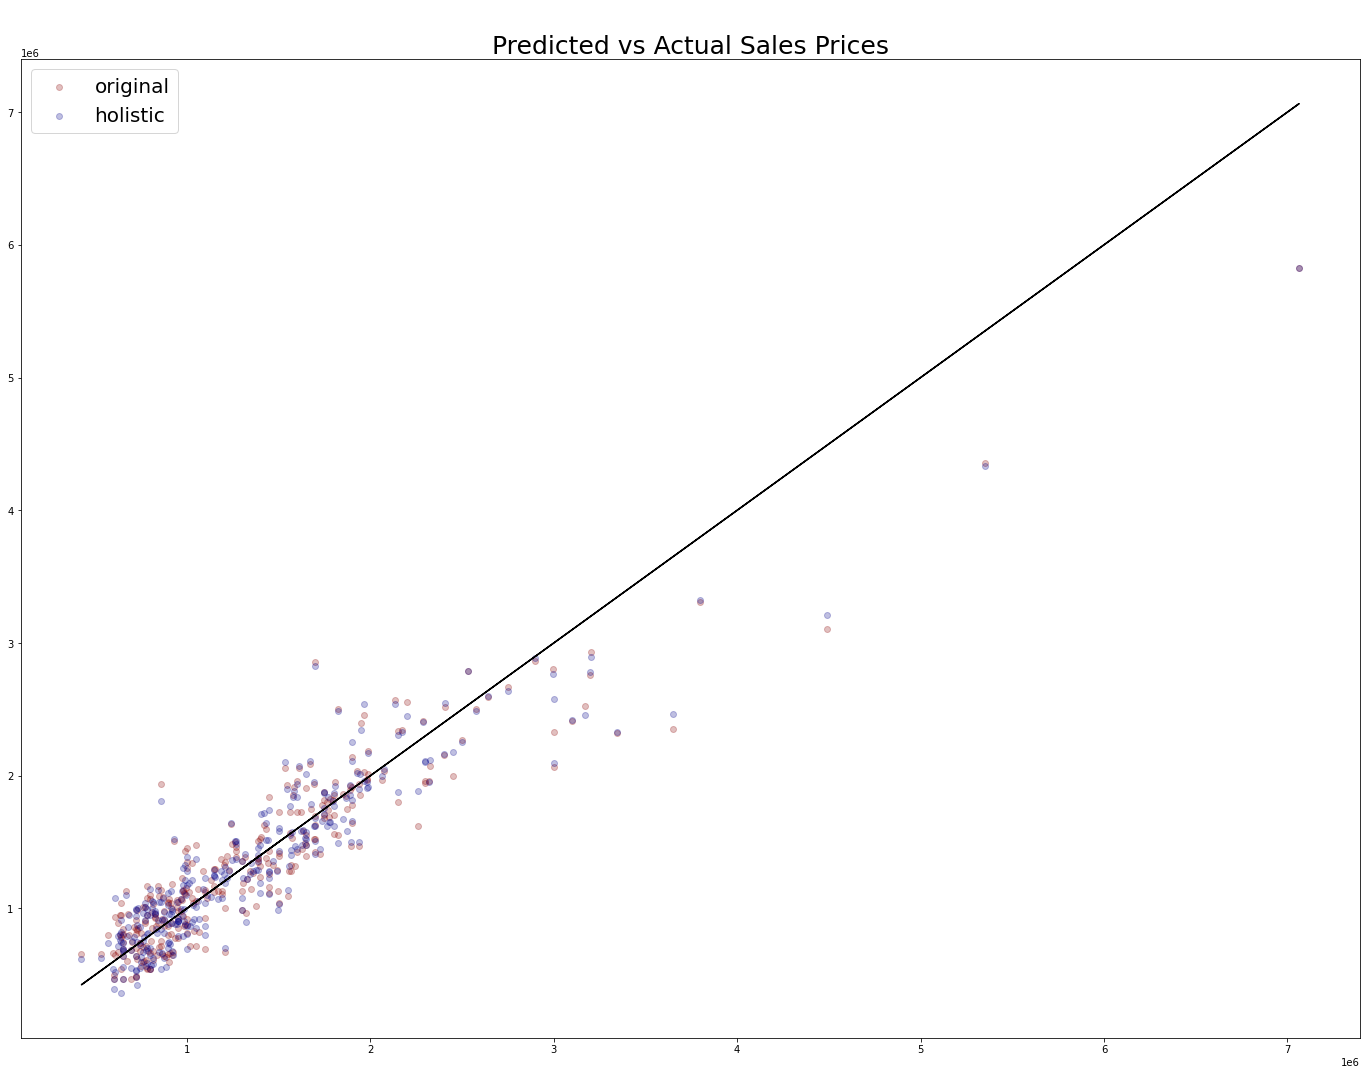

In [309]:
X = df_98004prices['price']

ŷ_orig = df_98004prices['ŷ_orig']
ŷ_holi = df_98004prices['ŷ_holi']



plt.figure(figsize = (24, 18))



plt.title("\nPredicted vs Actual Sales Prices", size=25)

 

plt.scatter(X, ŷ_orig, color='darkred', alpha=0.25)
plt.scatter(X, ŷ_holi, color='darkblue', alpha=0.25)

plt.legend(['original', 'holistic'], loc=2, prop={'size': 20})

plt.plot(X, X, color='black')



plt.show()

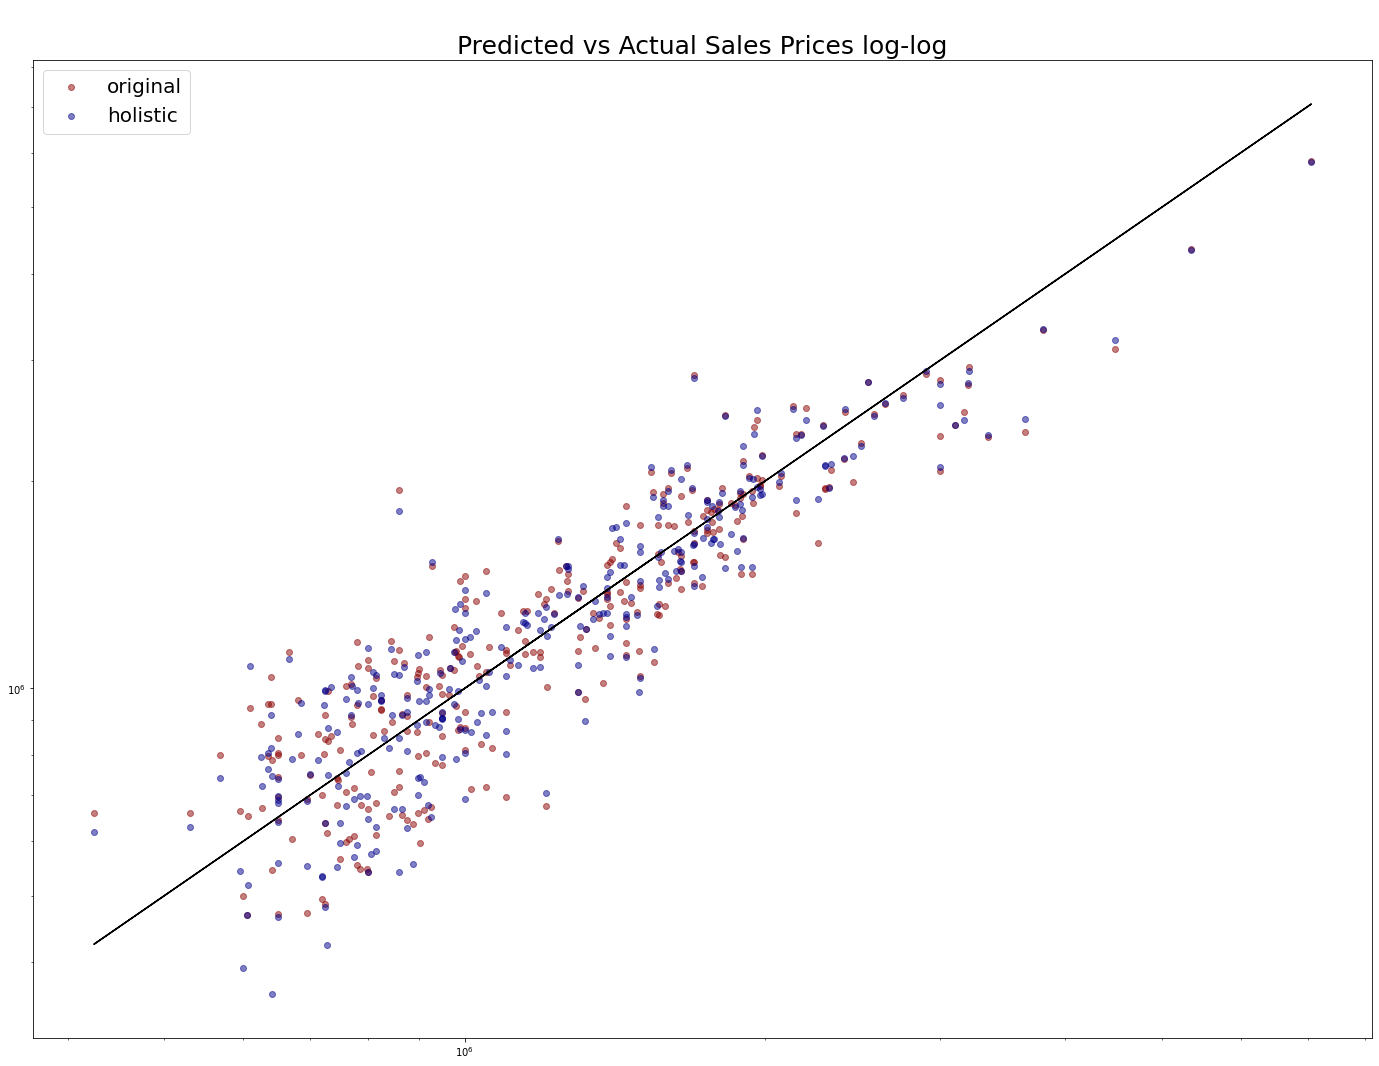

In [310]:
X = df_98004prices['price']

ŷ_orig = df_98004prices['ŷ_orig']
ŷ_holi = df_98004prices['ŷ_holi']

plt.figure(figsize = (24, 18))

plt.title("\nPredicted vs Actual Sales Prices log-log", size=25)

plt.scatter(X, ŷ_orig, color='darkred', alpha=0.5)
plt.scatter(X, ŷ_holi, color='darkblue', alpha=0.5)

plt.legend(['original', 'holistic'], loc=2, prop={'size': 20})

plt.plot(X, X, color='black')




plt.yscale('log')
plt.xscale('log')

plt.show()

<br><br>

Let's look at the coefficients of the holistic ridge model:

In [312]:
for i in range (0, len(features_holi)):
    print(features_holi[i].ljust(18), " ", RM_98004_holi.coef_[i])
    print()
     

floors               -175747.4474568181

waterfront           1240232.9019308272

lat                  145325.0406220645

bedrooms             -8656.041720185554

sqft_basement        -22.692602564148192

view                 193381.94795204088

bathrooms            -14281.683829397152

sqft_living15        74.06998916932798

sqft_above           248.47247251266222

grade                13620.682530512562

sqft_living          225.77987928602525

indicator coffee     1029.727443143203

indicator parks      -200.76979764737516

indicator restr      -2180.269859082297

indicator trails     -2482.2381771221194

indicator gyms       -6626.43289965789

indicator groc       4335.59873568326

indicator bus        -1488.3271613398108

indicator play       -3655.6186362203425

indicator pubs       5950.163915130528



<br><br>

Recall that only one indicator positively correlated with price.  Here we have three indicators with a positive coefficient mainly because they were not being used individually to predict price.  Also consider the fact that training data was selected randomly.

<br><br>

Our final analysis will involve mapping the absolute errors in predicted versus actual sales prices.

<br><br>

<br>
Click the three dots to reveal the function, map_predicted_ratios()  

In [313]:
def map_absErrors(df, predicted, actual):  
    
     
    
    # Inner function to convert a number to a color
    def color_b_to_w(num, lim_lo, lim_hi):
        frac = (num - lim_lo) / (lim_hi - lim_lo)

        if frac < 1/7: 
            r = 7*frac
            b = 0.0
            g = 0.0 

        elif frac < 2/7:

            r = 1.0
            g = 7*frac - 1.0
            b = 0.0

        elif frac < 3/7:

            r = -7*frac + 3.0
            g = 1.0
            b = 0.0

        elif frac < 4/7:

            r = 0.0
            g = 1.0
            b = 7*frac - 3.0

        elif frac < 5/7:

            r = 0.0
            g = -7*frac + 5.0
            b = 1.0

        elif frac < 6/7:

            r = 7*frac - 5.0
            g = 0.0
            b = 1.0

        else:
            r = 1.0
            g = 7*frac - 6.0
            b = 1.0	




        # fix roundoff problems:
        if r < 0.0:    
            r = 0.0 
        elif r > 1.0:
            r = 1.0 

        if g < 0.0:    
            g = 0.0 
        elif g > 1.0:
            g = 1.0 

        if b < 0.0:    
            b = 0.0 
        elif b > 1.0:
            b = 1.0 


        return (r,g,b)    
    
    
    
    
    

                 
     
  
     
    
    absError_0 = abs(df.iloc[0][predicted] - df.iloc[0][actual])
    
    absErrors = [absError_0]
    
    absError_hi = absError_lo = absError_0
           
    
                
            
    for i in range(1, df.shape[0]): 
        absError = abs(df.iloc[i][predicted] - df.iloc[i][actual])       
       
        absErrors.append(absError)
        
        if absError > absError_hi:
            absError_hi = absError
            
        elif absError < absError_lo:
            absError_lo = absError
            
            
         
    
    
    
    
    
    
   
    lat_mid = ( df['lat'].min() + df['lat'].max() ) / 2 
    lng_mid = ( df['lng'].min() + df['lng'].max() ) / 2
    
       
    mp = folium.Map(location=[lat_mid, lng_mid], zoom_start=12, tiles='Stamen Terrain')    
                 
    
        
    for i in range(0, df.shape[0]):
        
        lng = df.iloc[i]['lng']
        lat = df.iloc[i]['lat']
        
        color_absError = matplotlib.colors.to_hex(color_b_to_w(absErrors[i], 
                                                               absError_lo, 
                                                               absError_hi))
        
        folium.Circle(location=[lat, lng], radius=50, color=color_absError, fill=True,
                      fill_color=color_absError, alpha=0.1).add_to(mp)
        
                 
                    
                    
                    
                    
                     
    return mp

In [314]:
display(map_absErrors(df_98004prices, 'ŷ_holi', 'price'))

<br><br>

As before, black indicates a low value and white indicates a high value. &nbsp;

There is no obvious cluster where the predictive model does unually poorly or well.

<br><br><br>

<hr>


**<center><h2>Concluding Remarks</h2></center>** 



The presence of local venues seems to suppress the value of homes slightly. &nbsp; Incorporating venue location data allowed us to create a predictive model.&nbsp; Tuning the formulae for computing indicators may improve prediction even further.&nbsp; Additional refinements to predictive modeling may include venues not included by Foursquare.&nbsp; These would consist of hospitals, primary schools, universities, and perhaps airports.  